In [1]:
# from utils.dataset import extract_datasets
from utils.config import load_datasets
from SurvSet.data import SurvLoader
from utils.eda_methods import identify_features, plot_phenotypes_analysis, survival_analysis_plots, \
    univariate_analysis, bivariate_analysis, censoring_analysis, correlation_analysis
from utils.preprocess import preprocess

In [2]:
loader = SurvLoader()
ds_lst = loader.df_ds
ds_lst.head(76)

,ds,is_td,n,n_fac,n_ohe,n_num
0,hdfail,False,52422,5,87,1
1,stagec,False,146,4,15,3
2,veteran,False,137,3,5,3
3,vdv,False,78,0,0,4705
4,AML_Bull,False,116,0,0,6283
...,...,...,...,...,...,...
71,prostate,False,502,6,16,9
72,flchain,False,7874,4,26,6
73,grace,False,1000,2,2,3
74,gse3143,False,158,1,3,8660


In [3]:
loader.load_dataset("flchain")

{'df':        pid  event  time  num_age  num_kappa  num_lambda  num_flc_grp  \
 0        0      1    85       97      5.700       4.860           10   
 1        1      1  1281       92      0.870       0.683            1   
 2        2      1    69       94      4.360       3.850           10   
 3        3      1   115       92      2.420       2.220            9   
 4        4      1  1039       93      1.320       1.690            6   
 ...    ...    ...   ...      ...        ...         ...          ...   
 7869  7869      0  4997       52      1.210       1.610            6   
 7870  7870      0  3652       52      0.858       0.581            1   
 7871  7871      0  2507       54      1.700       1.720            8   
 7872  7872      0  4982       53      1.710       2.690            9   
 7873  7873      0  3995       50      1.190       1.250            4   
 
       num_creatinine  num_sample_yr fac_sex  fac_chapter fac_sample_yr  \
 0                1.7           1997     

Description of the variables in the French Tree Cities Study used in exercise 6
 of Chapter 7 Data used in Chapter 7 of Hosmer, D.W. and Lemeshow, S. and May, S. (2008)
Applied Survival Analysis: Regression Modeling of Time to Event Data: Second Edition,
John Wiley and Sons Inc., New York, NY


Data are in file FRTCS.dat
n = 697

Variable    Description                         Codes / Values
id          ID Code                             1 - 697
age         Age at enrollment                   years
sex         Gender                              1 = male
                                                2 = female
date0       Date of Baseline                    ddmmmyy
sbp0        Systolic Blood Pressure             mmHg
              at Baseline
dbp0        Diastolic Blood Pressure            mmHg
              at Baseline
antihyp0    Use of Antihypertensive Drugs       0 = No
              at First Follow Up                1 = Yes
date1       Date of Baseline                    ddmmmyy
sbp1        Systolic Blood Pressure             mmHg
              at First Follow Up
dbp1        Diastolic Blood Pressure            mmHg
              at First Follow Up
antihyp1    Use of Antihypertensive Drugs       0 = No
              at First Follow Up                1 = Yes
date2       Date of Second Follow Up            ddmmmyy
sbp2        Systolic Blood Pressure             mmHg
              at Second Follow Up
dbp2        Diastolic Blood Pressure            mmHg
              at Second Follow Up
antihyp2    Use of Antihypertensive Drugs       0 = No
              at Second Follow Up               1 = Yes
date_event  Date of Event or                    ddmmmyy
            End of Follow Up
censor      Event Indicator                     1 = Event
                                                0 = Censor

In [4]:
dataset = load_datasets(names=['flchain_vae'], folder='../outputs/generated_datasets')

In [5]:
dataset['flchain_vae'].head()

,fac_sex_M,fac_chapter_Circulatory,fac_chapter_Congenital,fac_chapter_Digestive,fac_chapter_Endocrine,fac_chapter_External Causes,fac_chapter_Genitourinary,fac_chapter_Ill Defined,fac_chapter_Infectious,fac_chapter_Injury and Poisoning,...,fac_mgus_Y,num_age,num_kappa,num_lambda,num_flc_grp,num_creatinine,num_sample_yr,pid,event,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.717816,0.647866,-0.088263,1.226680,-0.773457,-0.448028,2080.711425,1.0,2481.093994
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.772805,0.144277,-1.091624,1.574733,-0.467877,0.121147,5784.095595,0.0,952.781433
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.229130,-0.565715,-0.643405,-1.557744,-0.215333,-1.017203,7331.032368,0.0,4711.015625
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.256047,-0.756288,-0.177313,-1.209691,0.484525,-0.448028,6091.586953,0.0,3884.744141
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.018233,-0.453201,-0.503565,-0.513585,0.436677,-0.448028,2918.992781,0.0,2484.918213


In [6]:
dataset = dataset['flchain_vae']

In [7]:
dataset.head()

,fac_sex_M,fac_chapter_Circulatory,fac_chapter_Congenital,fac_chapter_Digestive,fac_chapter_Endocrine,fac_chapter_External Causes,fac_chapter_Genitourinary,fac_chapter_Ill Defined,fac_chapter_Infectious,fac_chapter_Injury and Poisoning,...,fac_mgus_Y,num_age,num_kappa,num_lambda,num_flc_grp,num_creatinine,num_sample_yr,pid,event,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.717816,0.647866,-0.088263,1.226680,-0.773457,-0.448028,2080.711425,1.0,2481.093994
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.772805,0.144277,-1.091624,1.574733,-0.467877,0.121147,5784.095595,0.0,952.781433
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.229130,-0.565715,-0.643405,-1.557744,-0.215333,-1.017203,7331.032368,0.0,4711.015625
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.256047,-0.756288,-0.177313,-1.209691,0.484525,-0.448028,6091.586953,0.0,3884.744141
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.018233,-0.453201,-0.503565,-0.513585,0.436677,-0.448028,2918.992781,0.0,2484.918213


In [8]:
dataset = dataset.drop(columns=['pid'])

In [9]:
cluster_dataset = dataset.drop(columns=['time', 'event'])

In [10]:

dataset = dataset.loc[:, (dataset != 0).any(axis=0)]


In [11]:
cluster_dataset = identify_features(cluster_dataset)
dataset = identify_features(dataset)

Fitting the following Dimensionality Reduction Model:
 PCA(random_state=100)
Fitting the following Clustering Model:
 KMeans(random_state=100)


C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Fitting the following Dimensionality Reduction Model:
 PCA(random_state=100)
Fitting the following Clustering Model:
 KMeans(random_state=100)


C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
cluster_dataset.head()

,fac_sex_M,fac_chapter_Circulatory,fac_chapter_Congenital,fac_chapter_Digestive,fac_chapter_Endocrine,fac_chapter_External Causes,fac_chapter_Genitourinary,fac_chapter_Ill Defined,fac_chapter_Infectious,fac_chapter_Injury and Poisoning,...,fac_sample_yr_2002,fac_sample_yr_2003,fac_mgus_Y,num_age,num_kappa,num_lambda,num_flc_grp,num_creatinine,num_sample_yr,phenotypes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.717816,0.647866,-0.088263,1.226680,-0.773457,-0.448028,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.772805,0.144277,-1.091624,1.574733,-0.467877,0.121147,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.229130,-0.565715,-0.643405,-1.557744,-0.215333,-1.017203,7
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.256047,-0.756288,-0.177313,-1.209691,0.484525,-0.448028,7
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.018233,-0.453201,-0.503565,-0.513585,0.436677,-0.448028,6


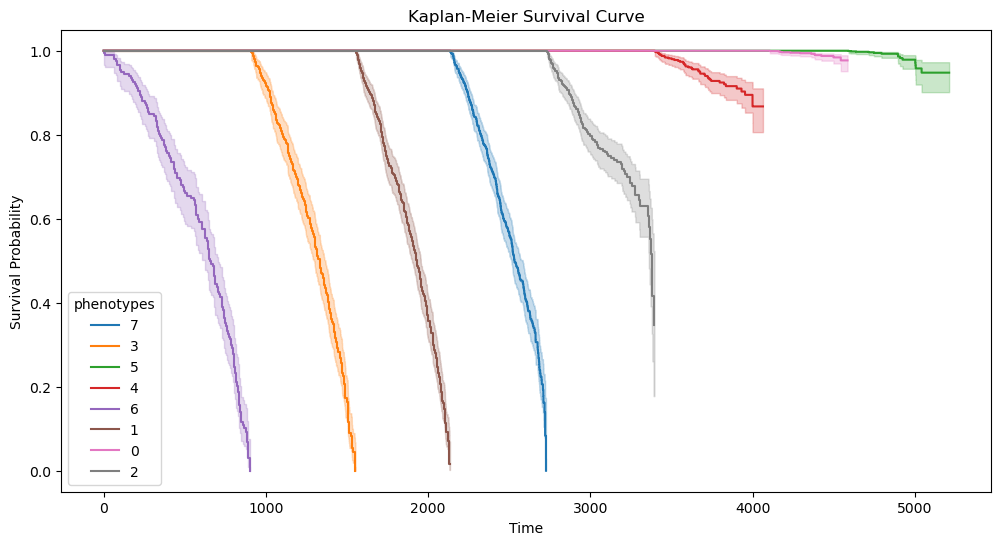

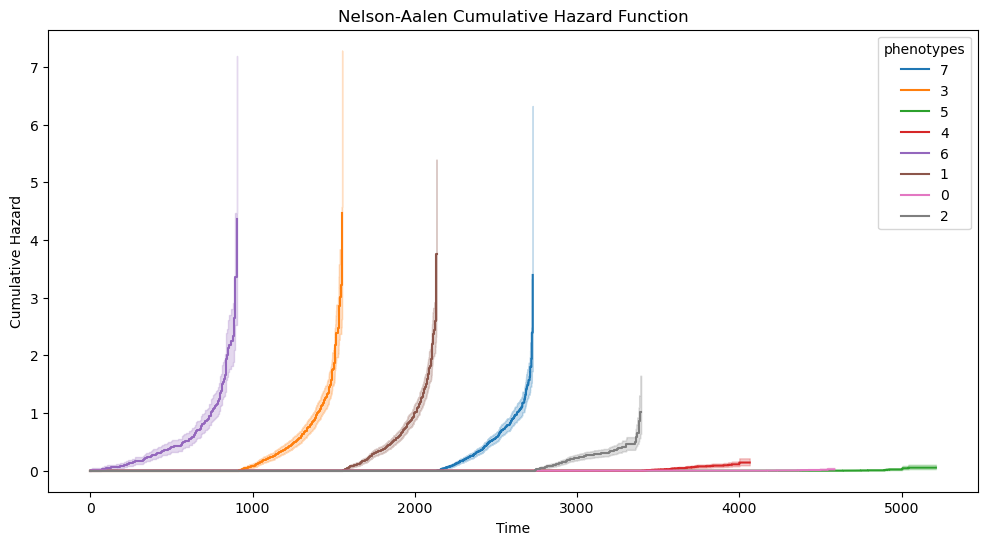

In [13]:
survival_analysis_plots(dataset, 'phenotypes')

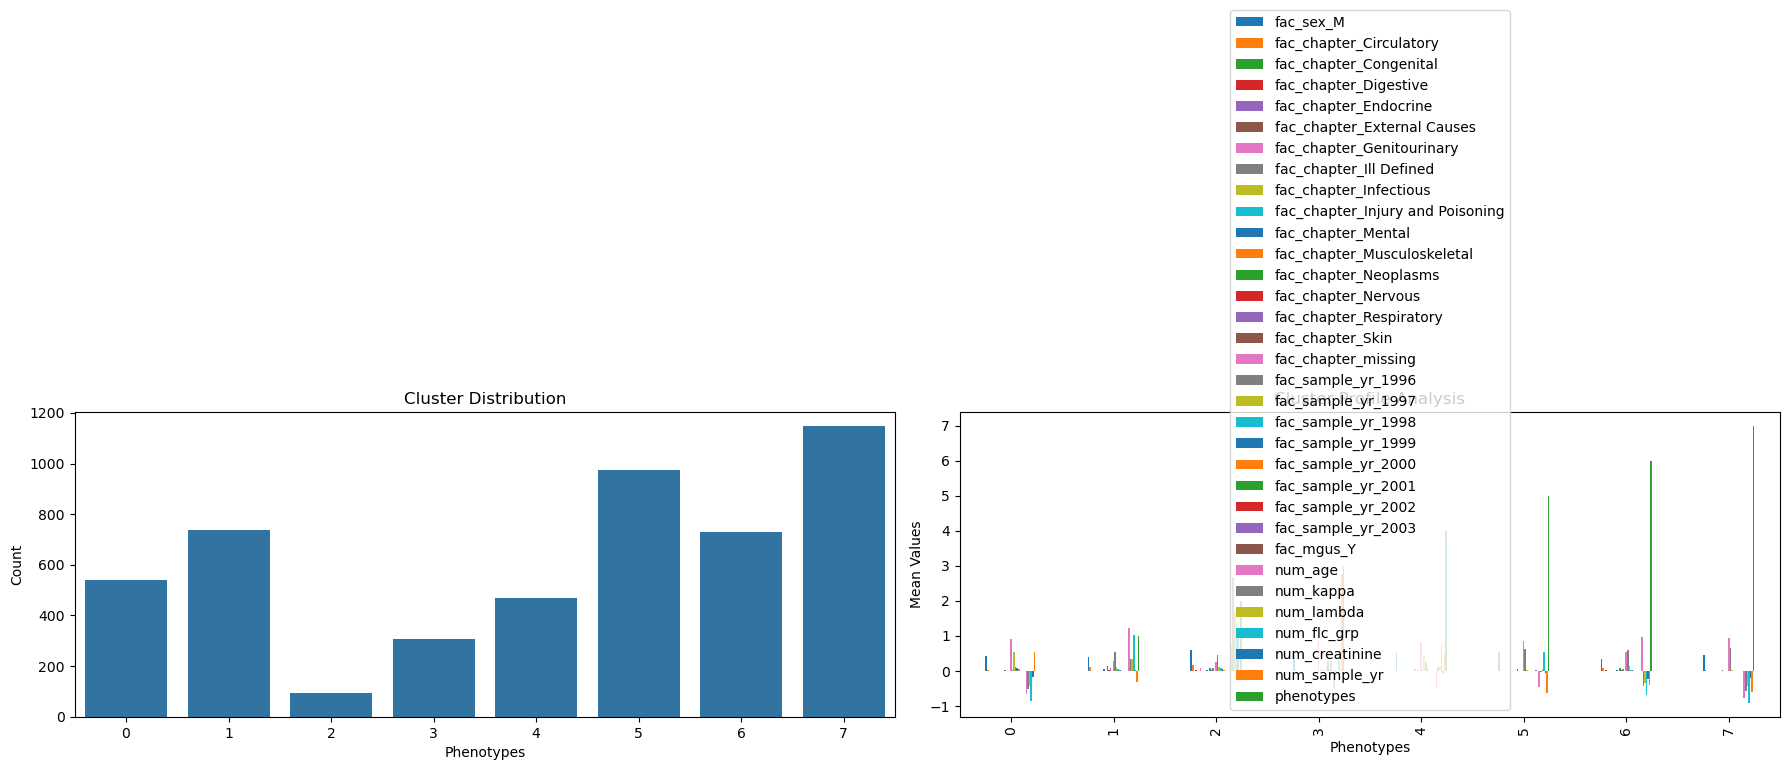

In [14]:
plot_phenotypes_analysis(cluster_dataset)

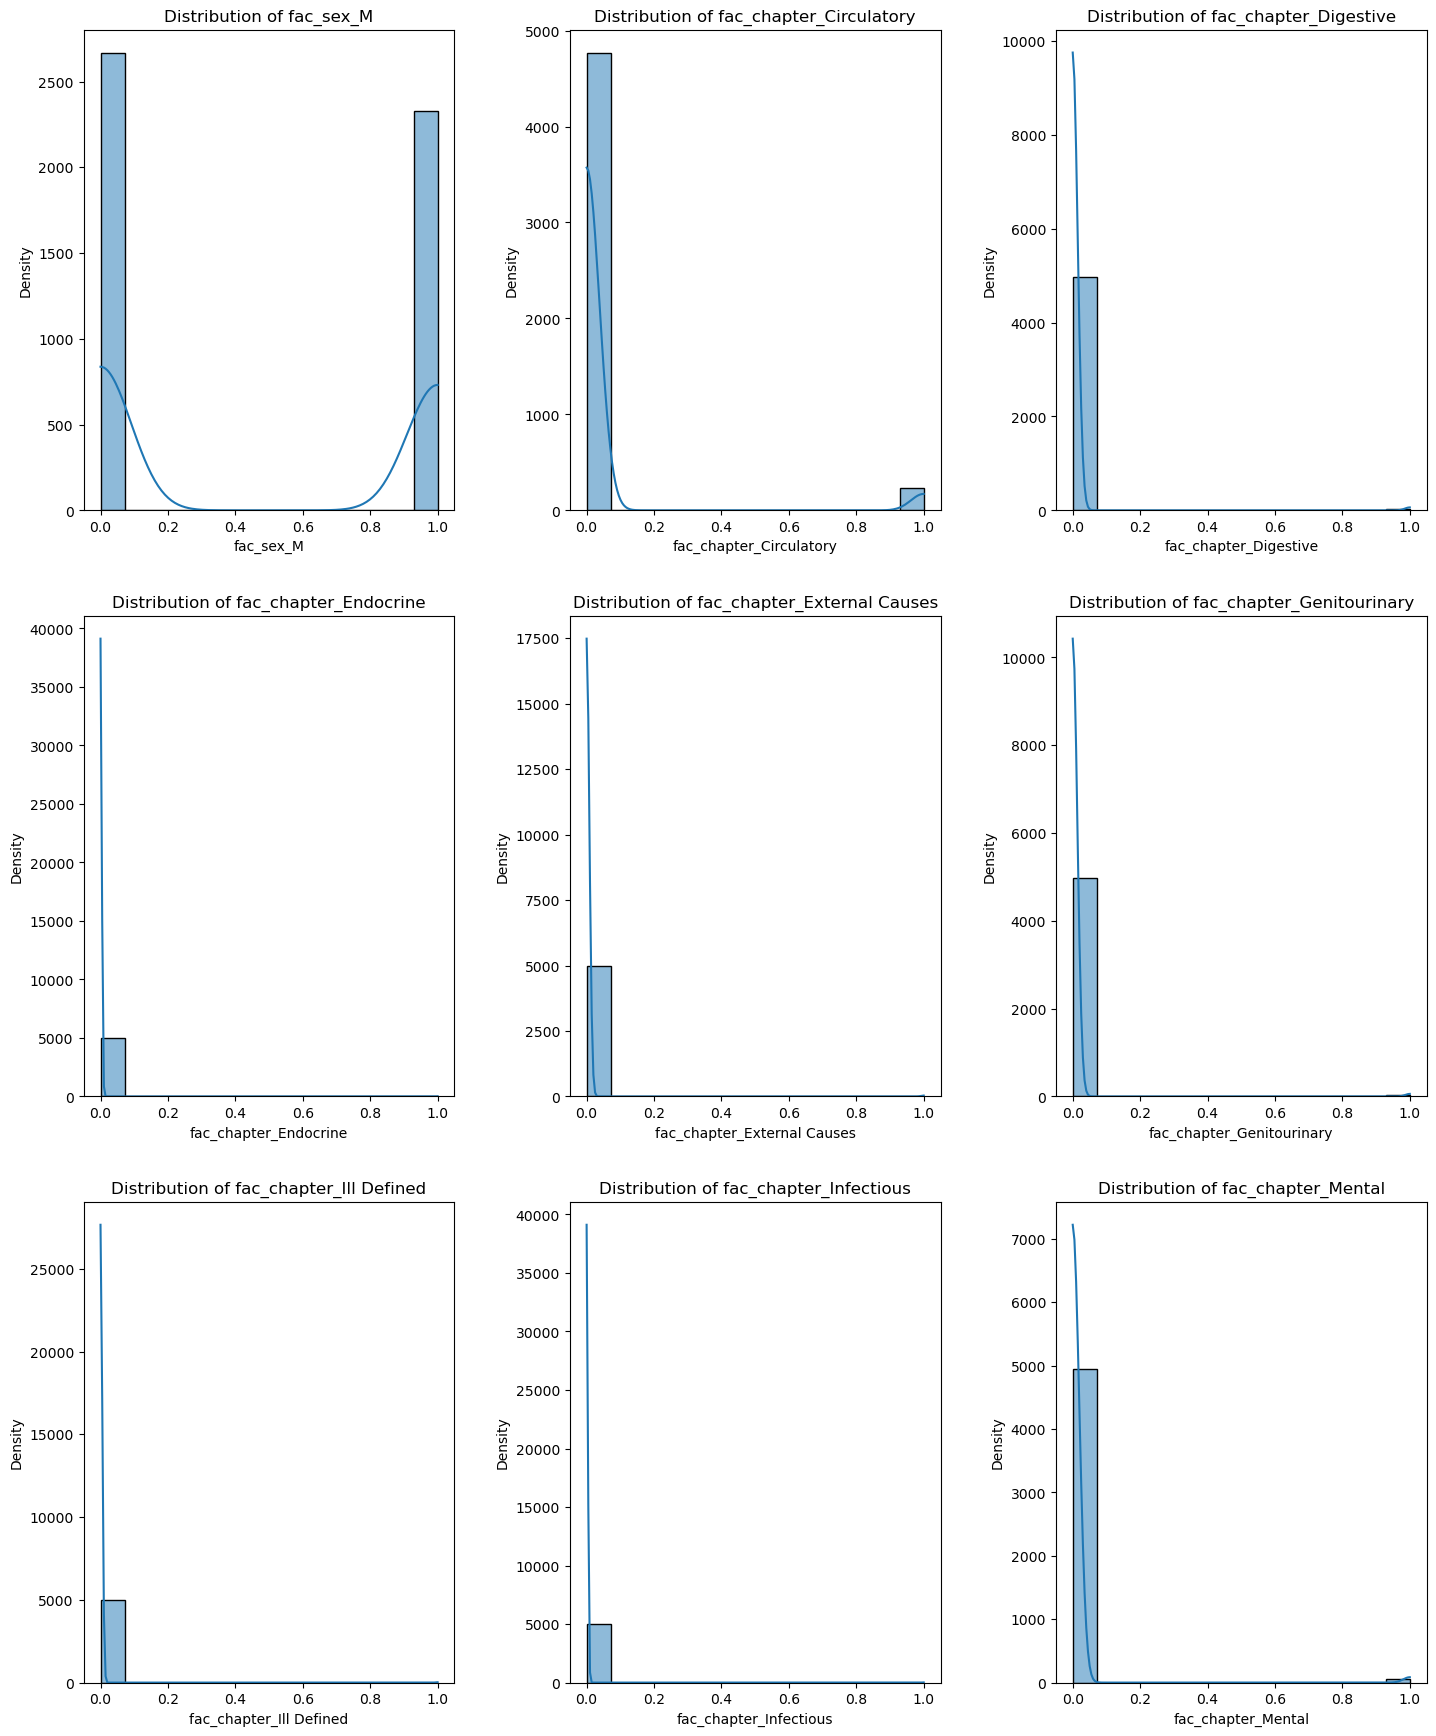

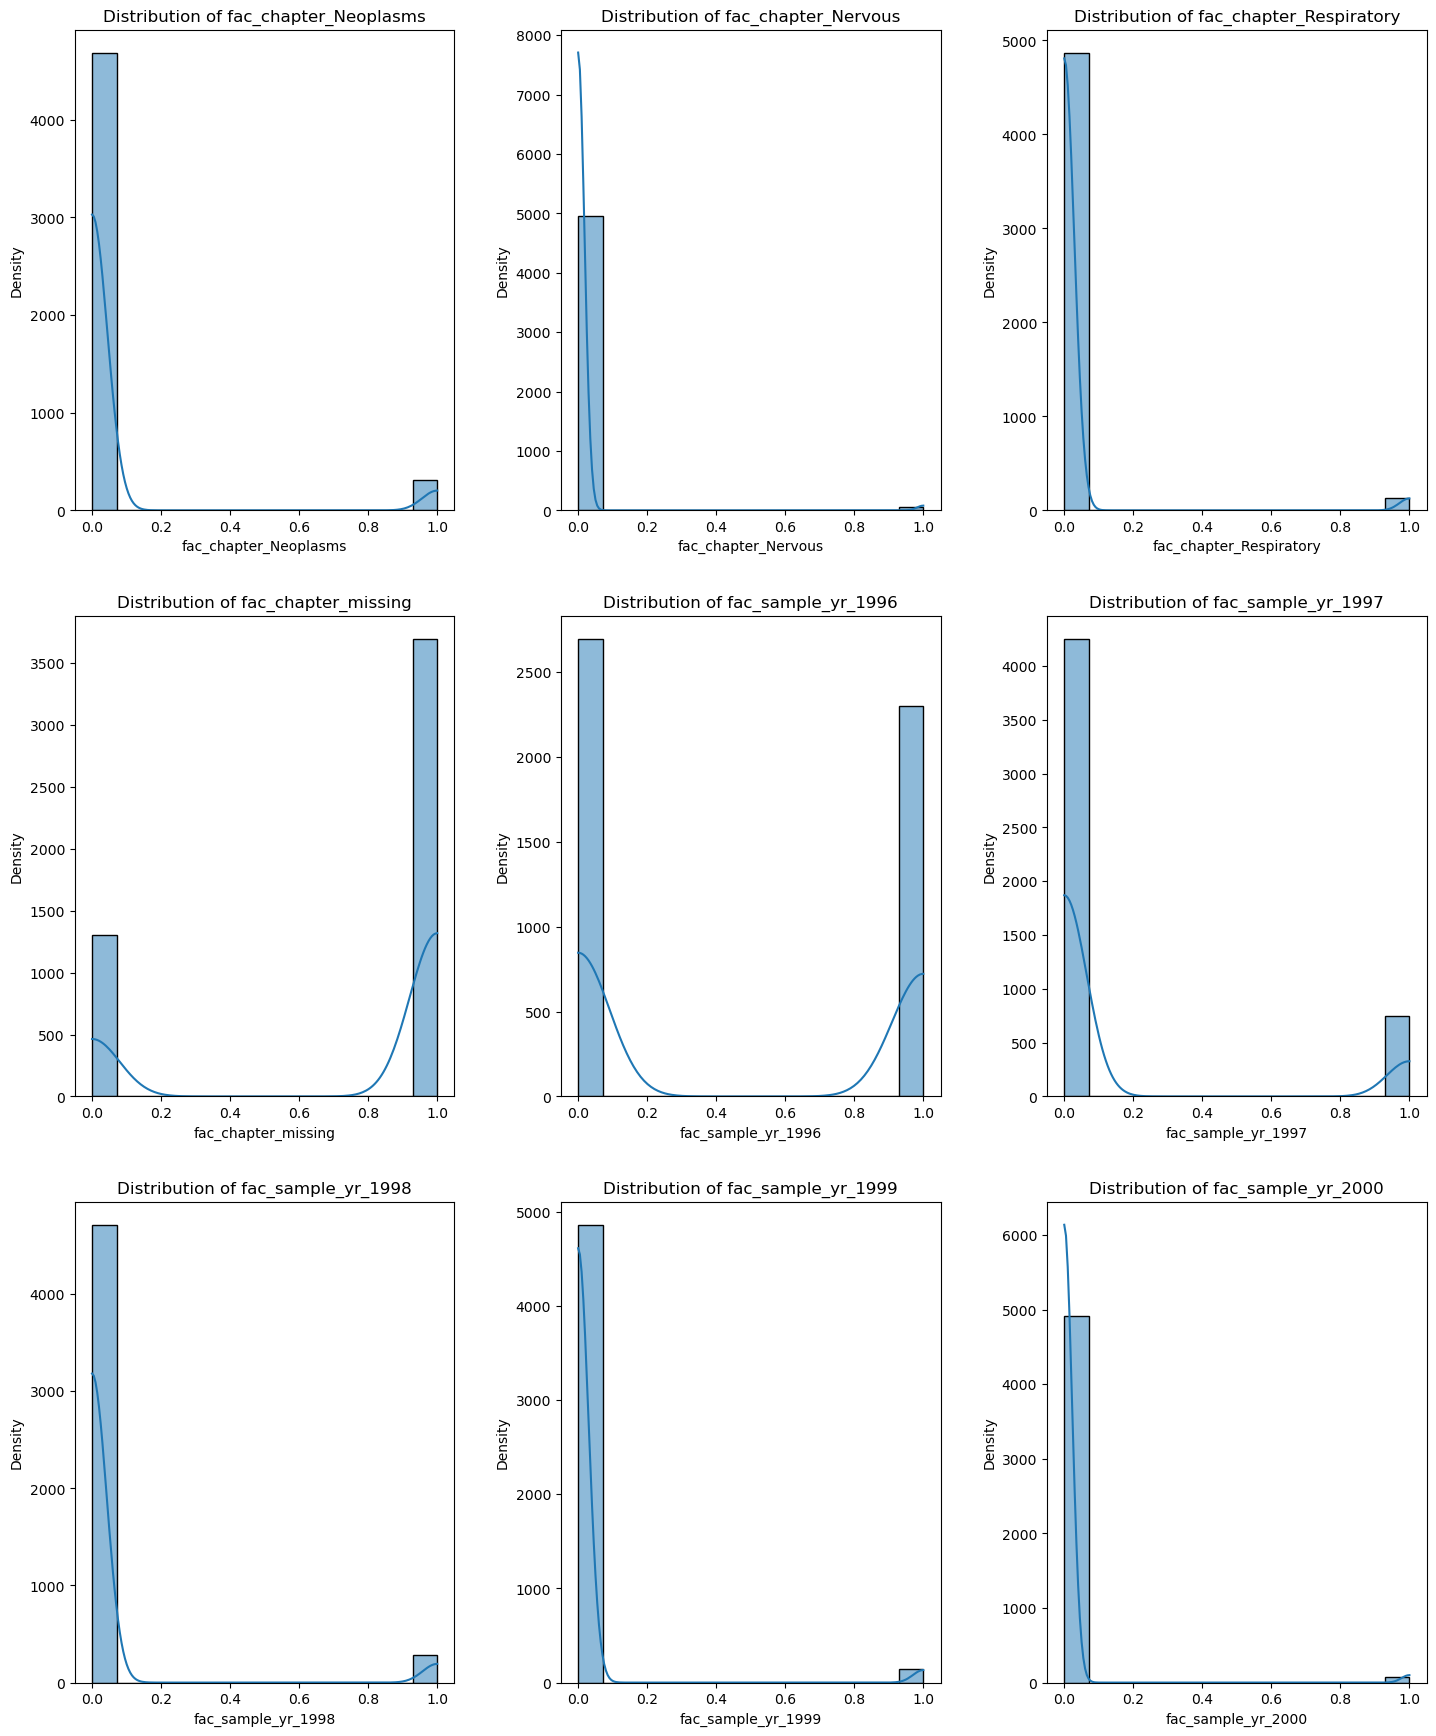

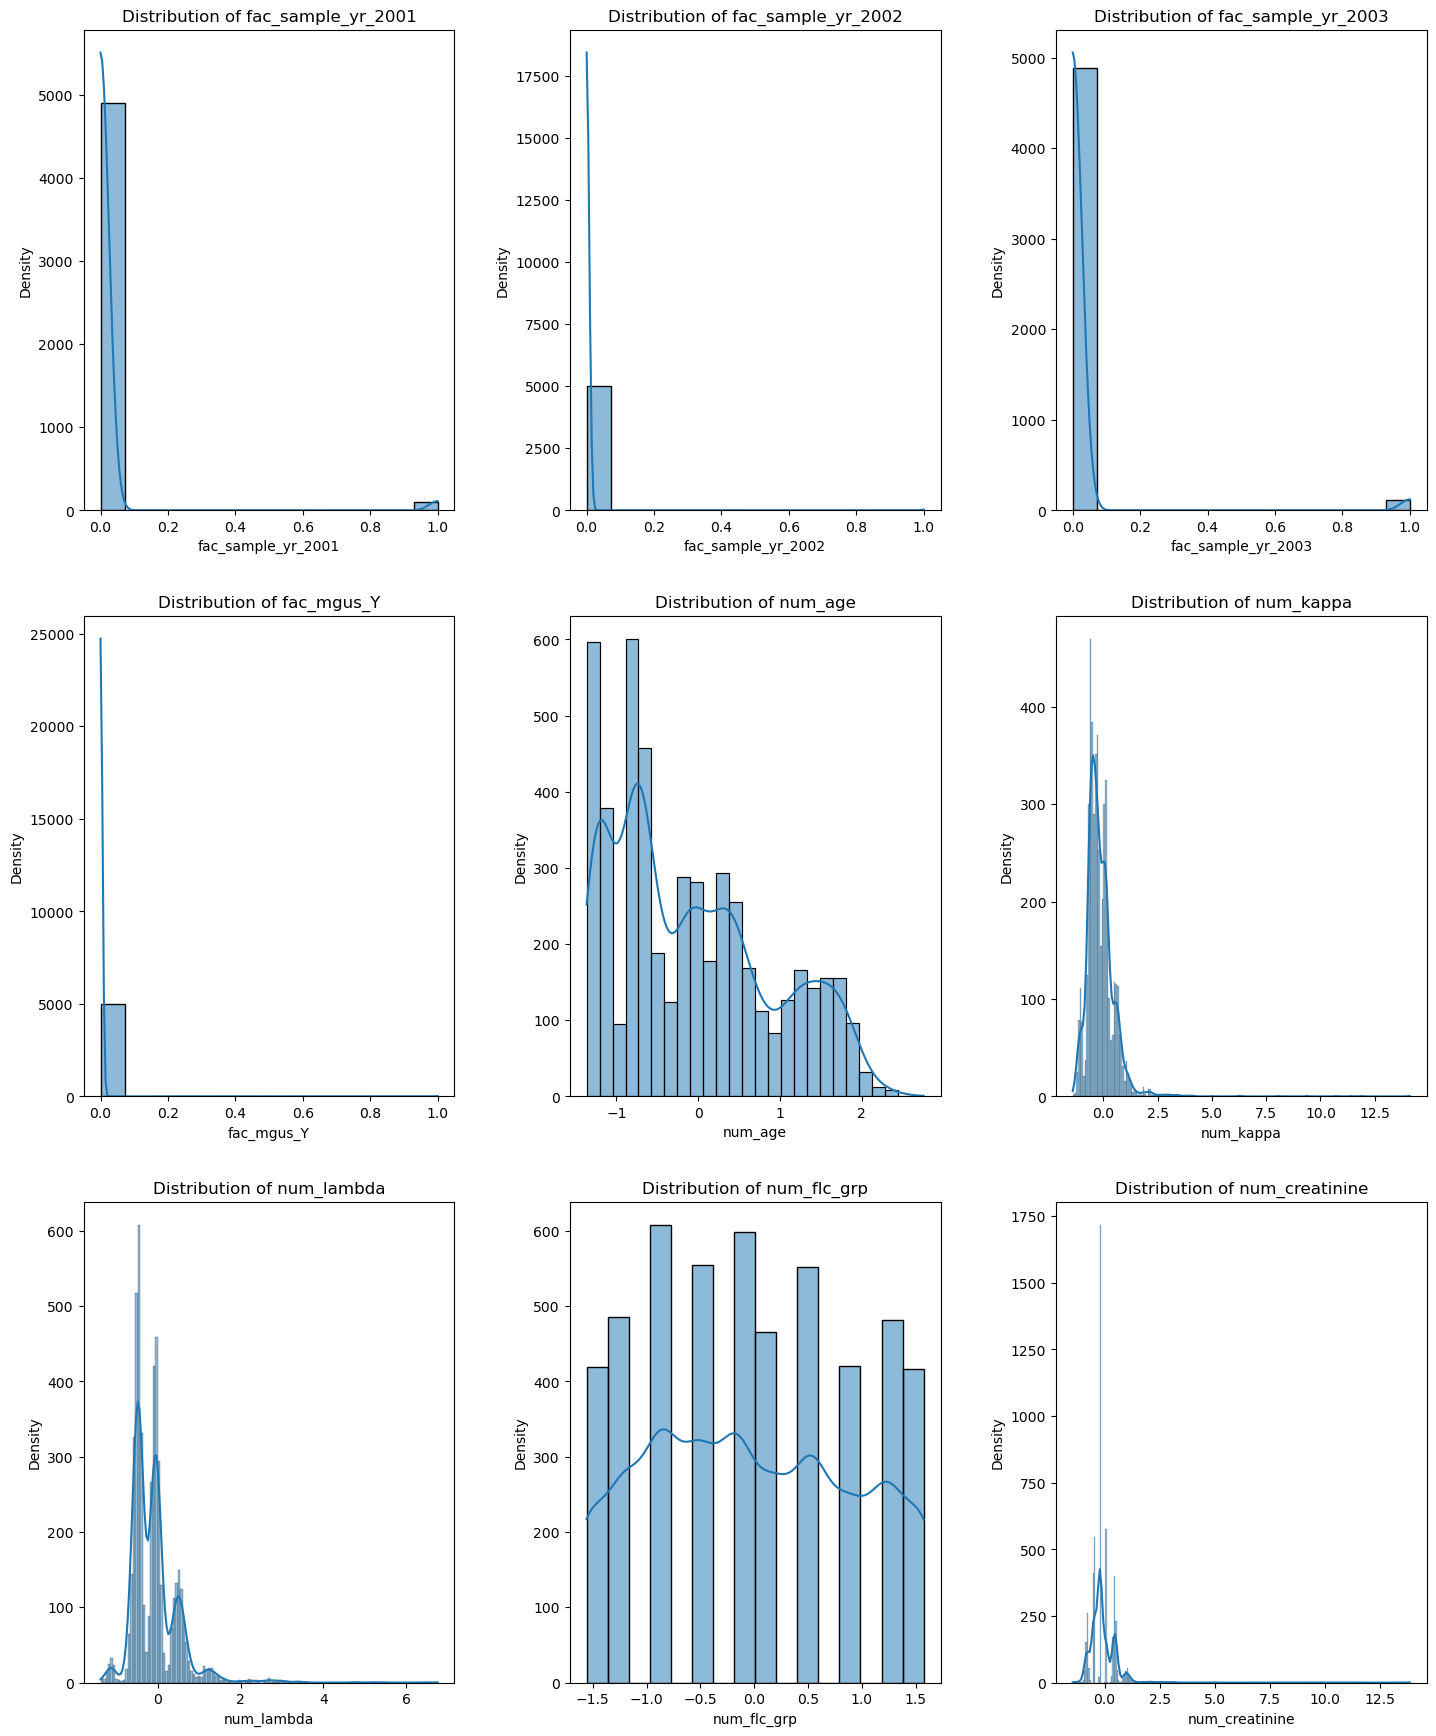

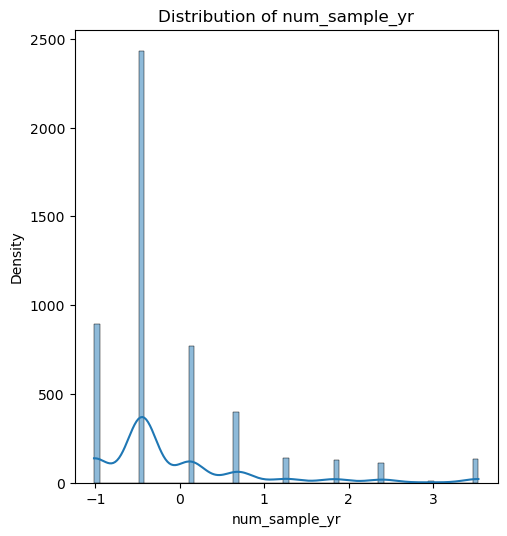

In [15]:
univariate_analysis(dataset)

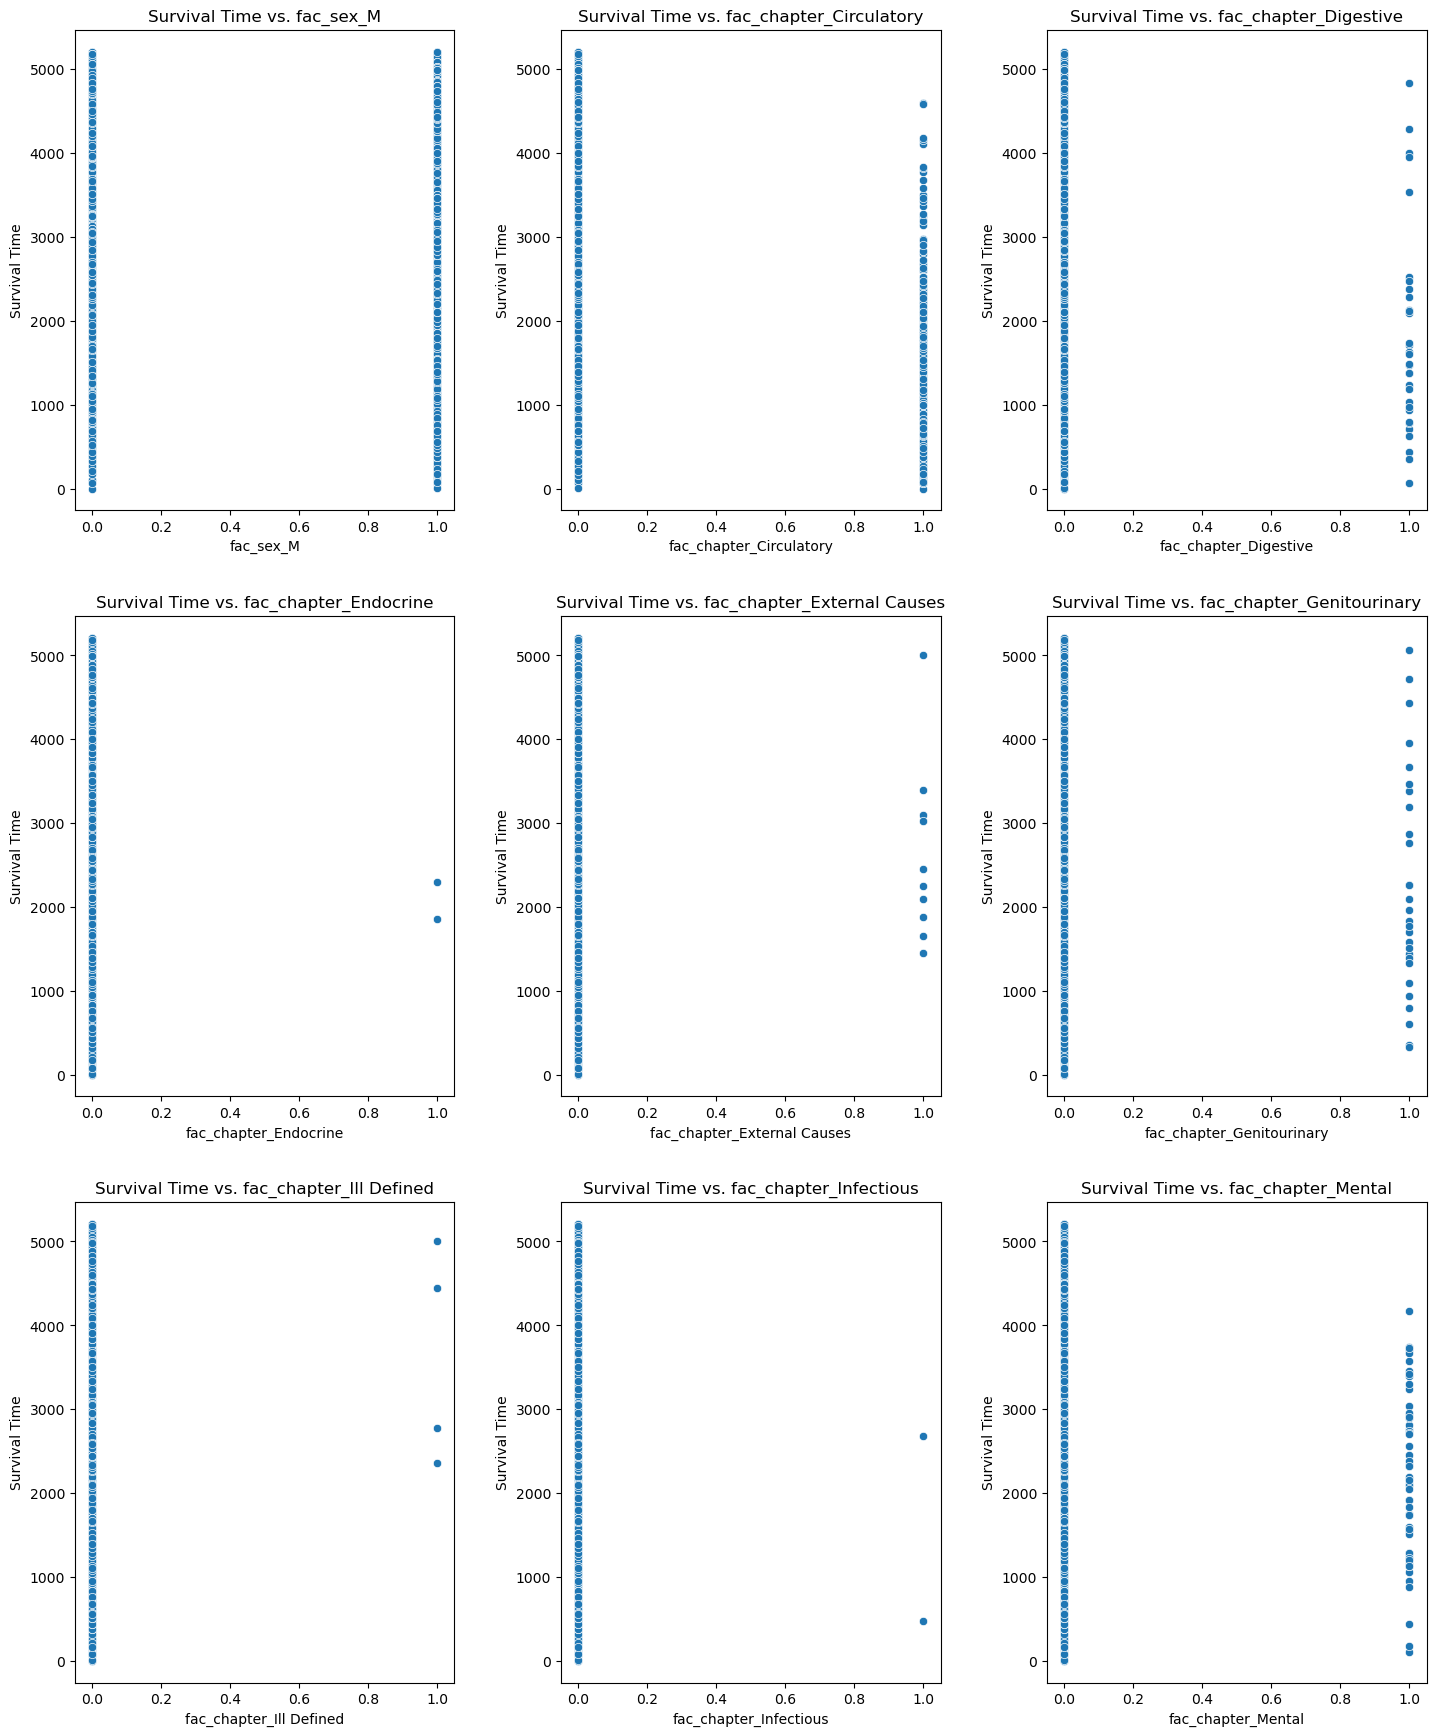

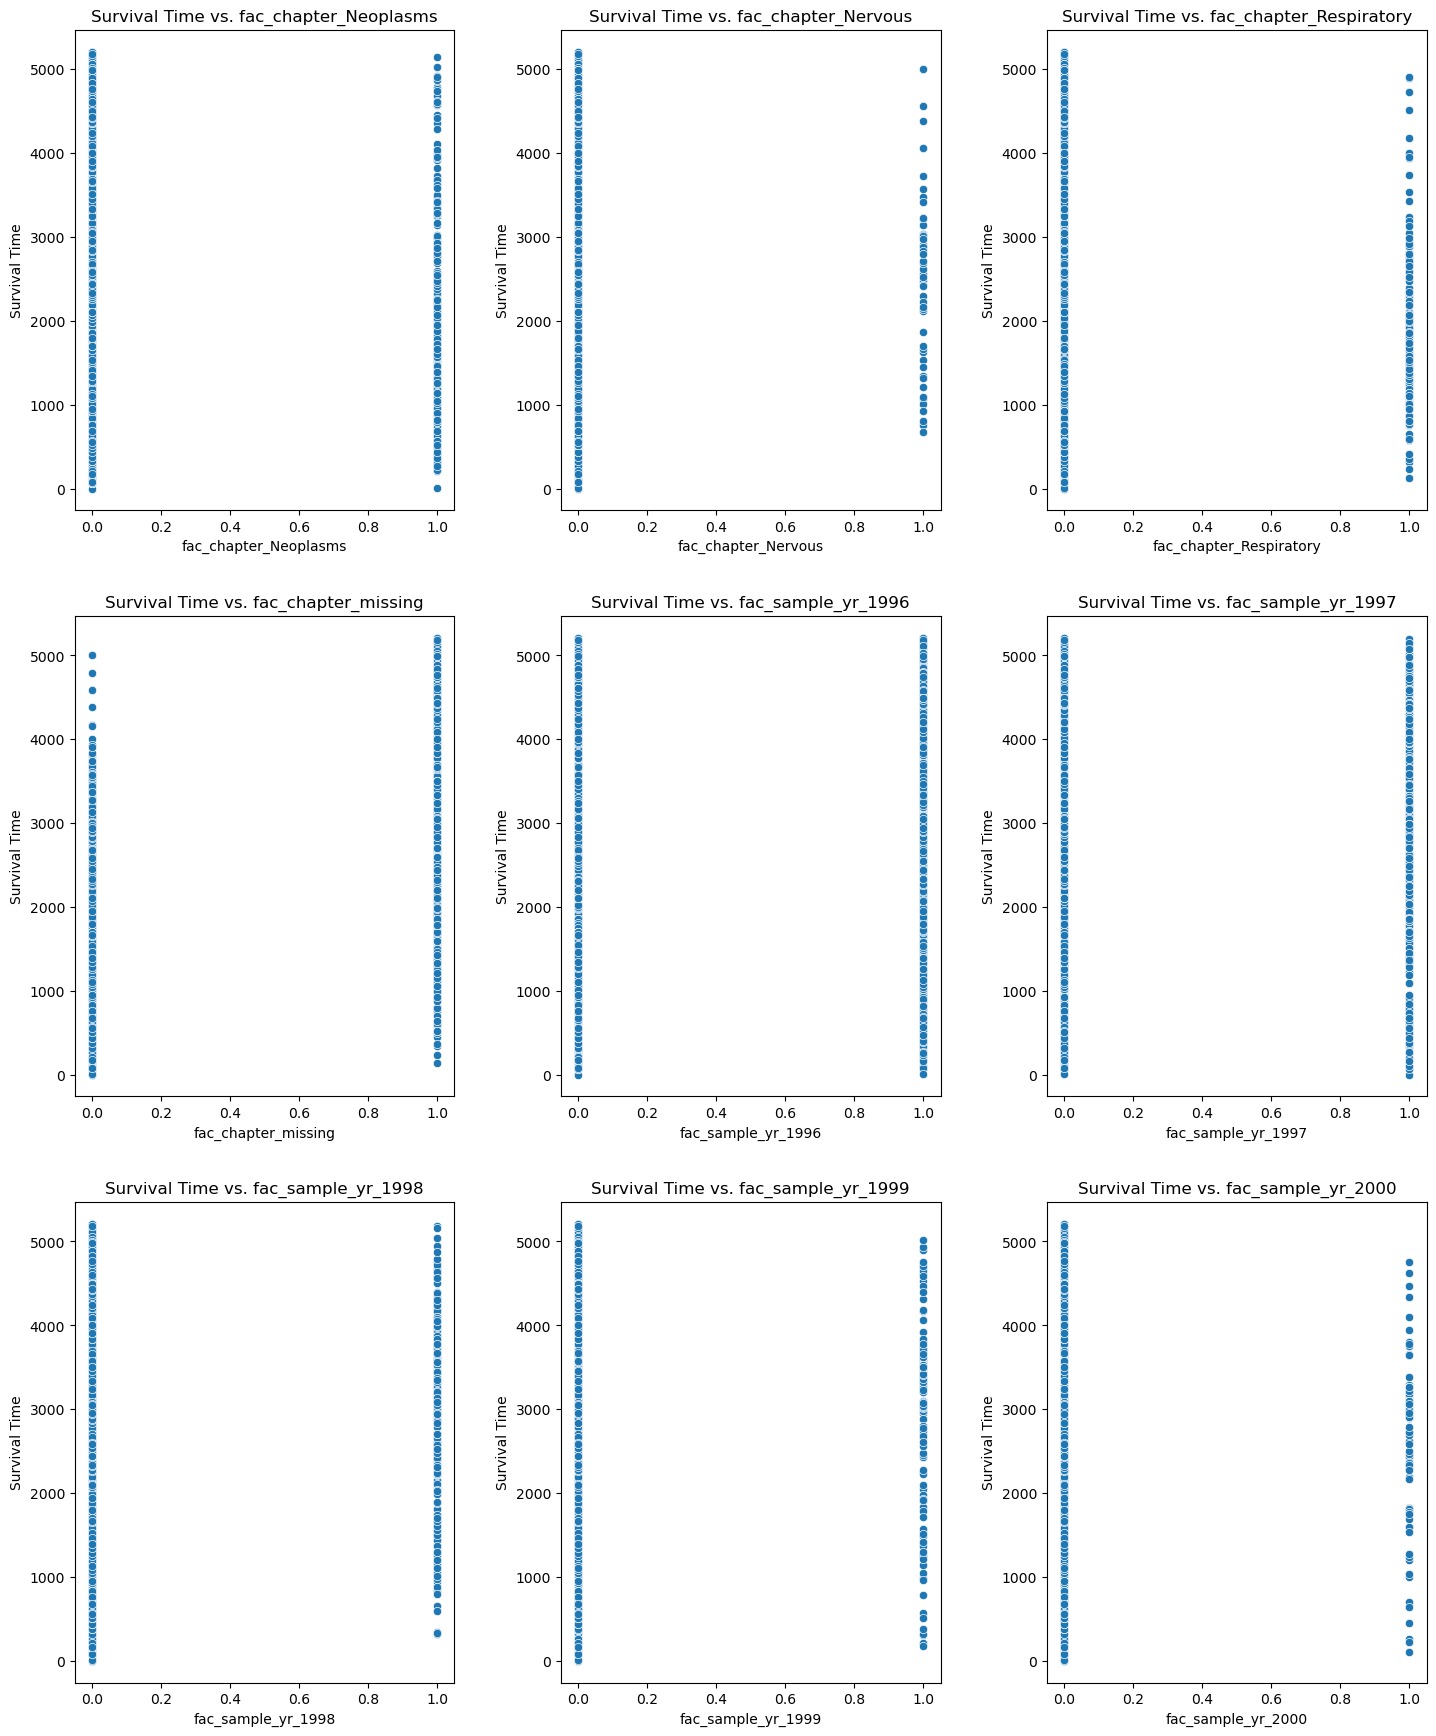

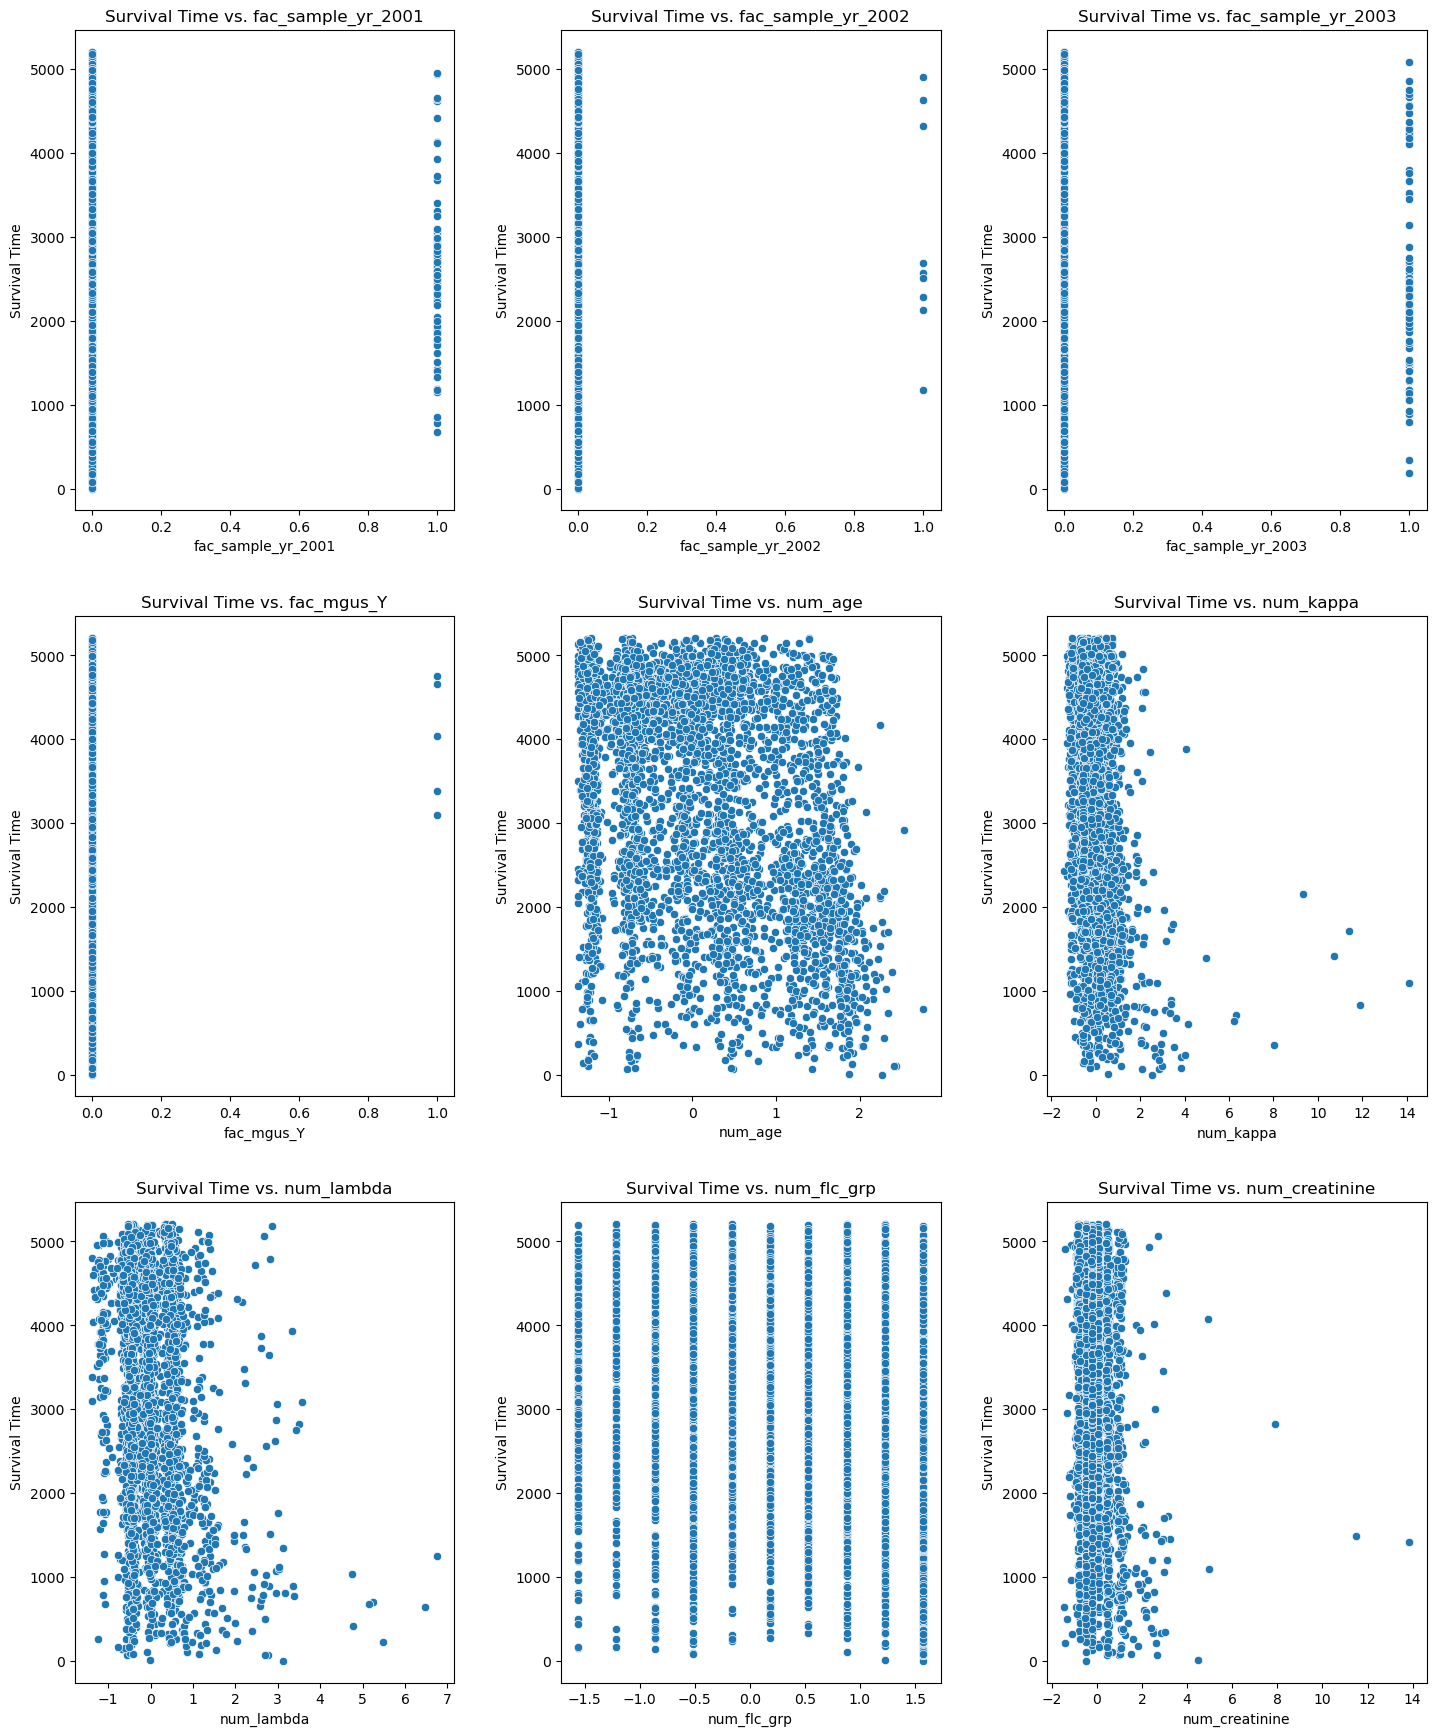

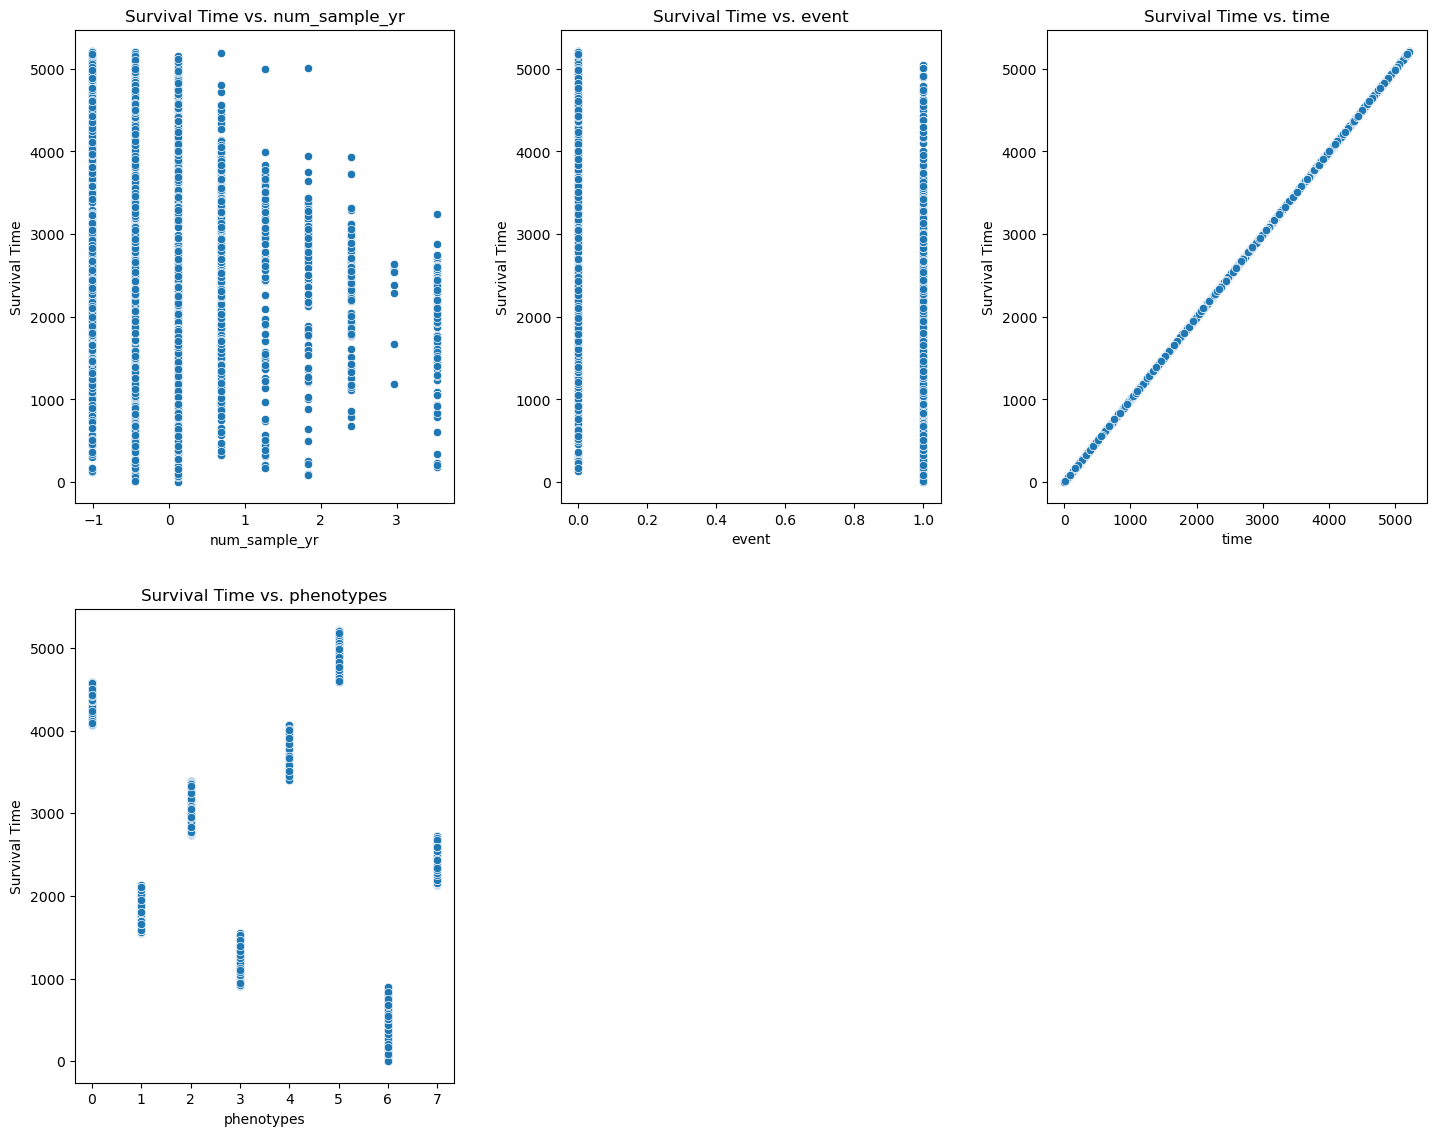

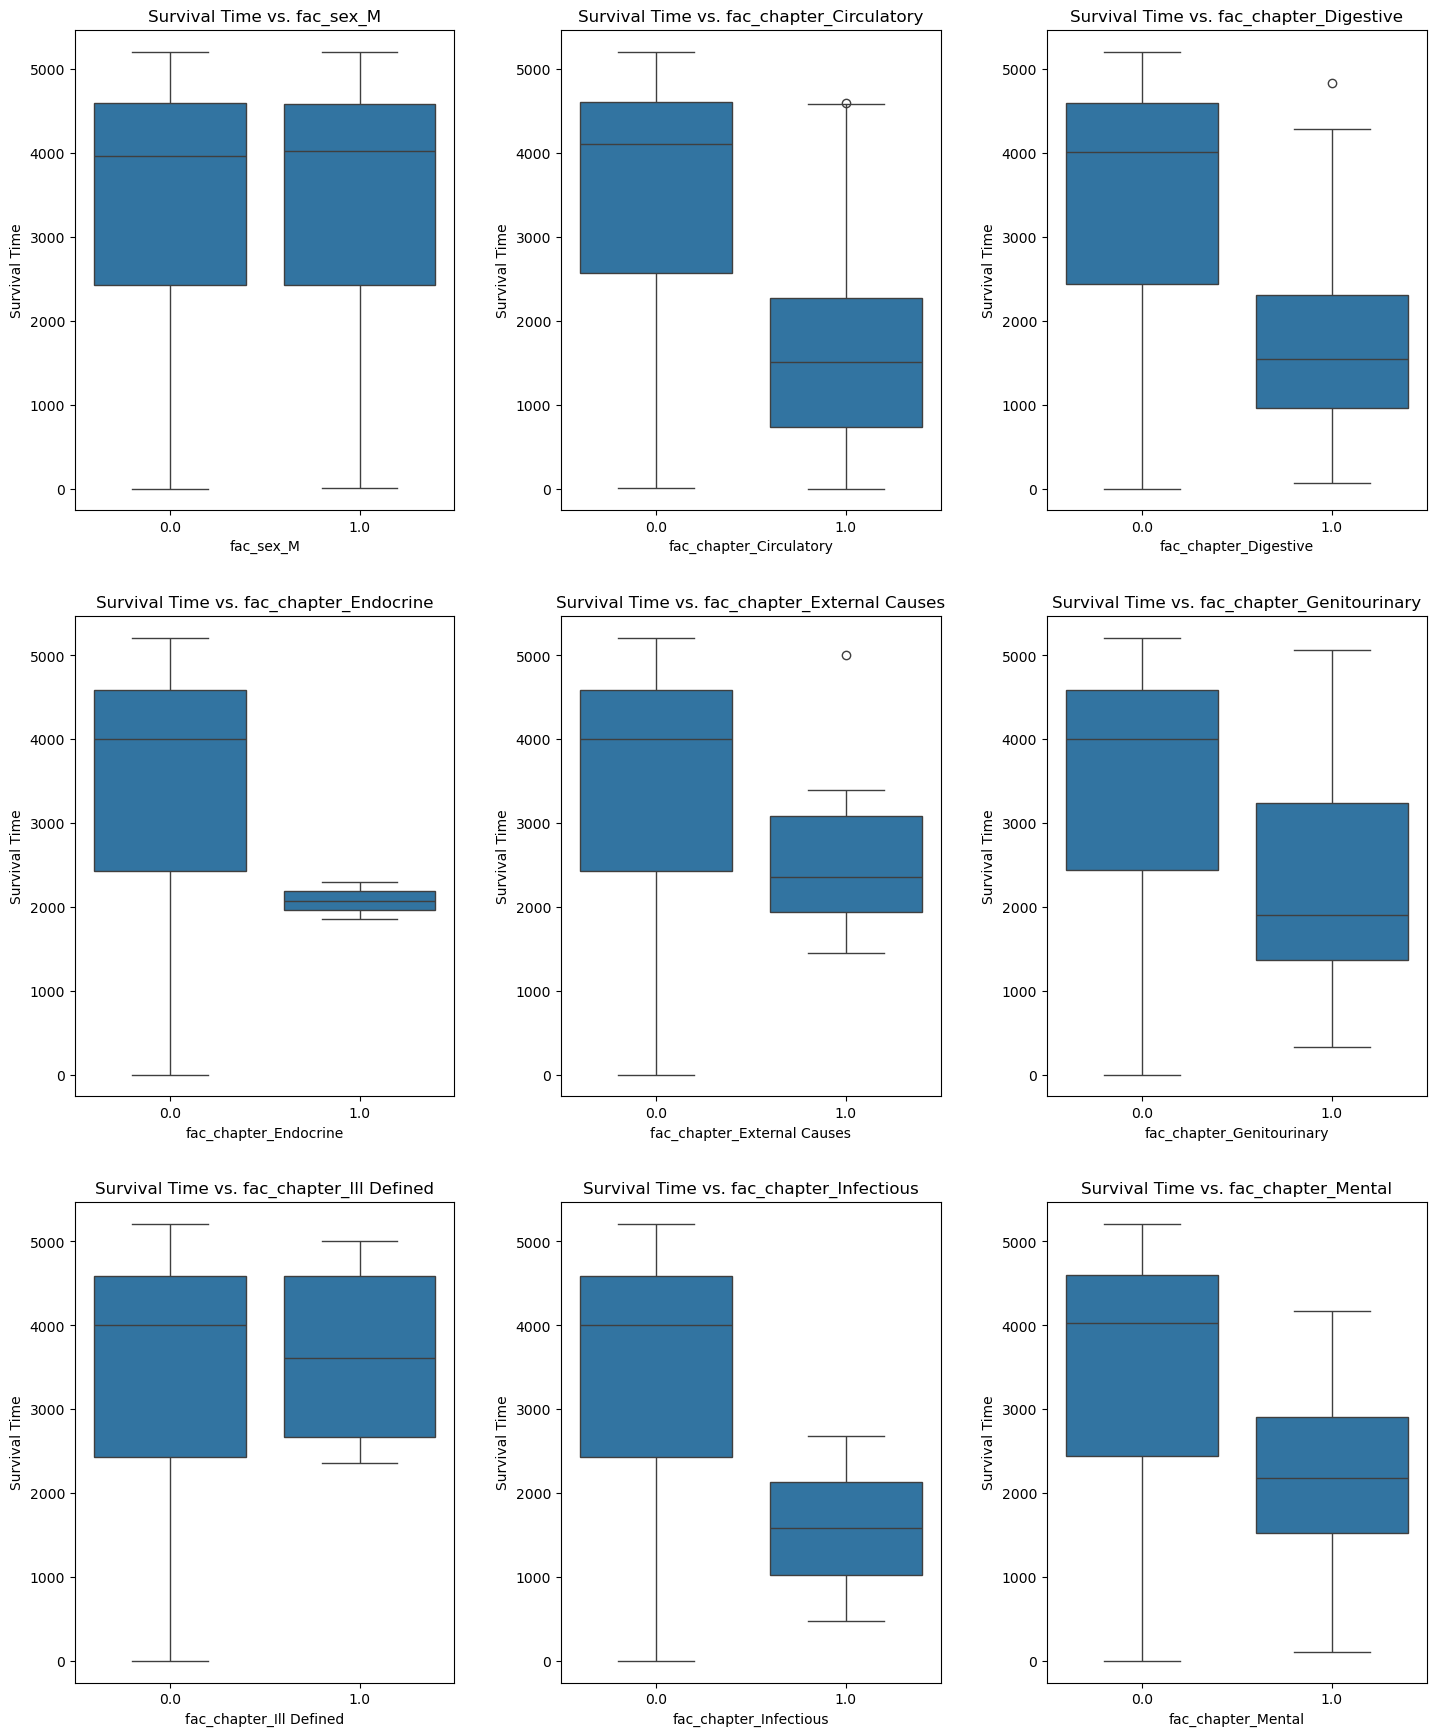

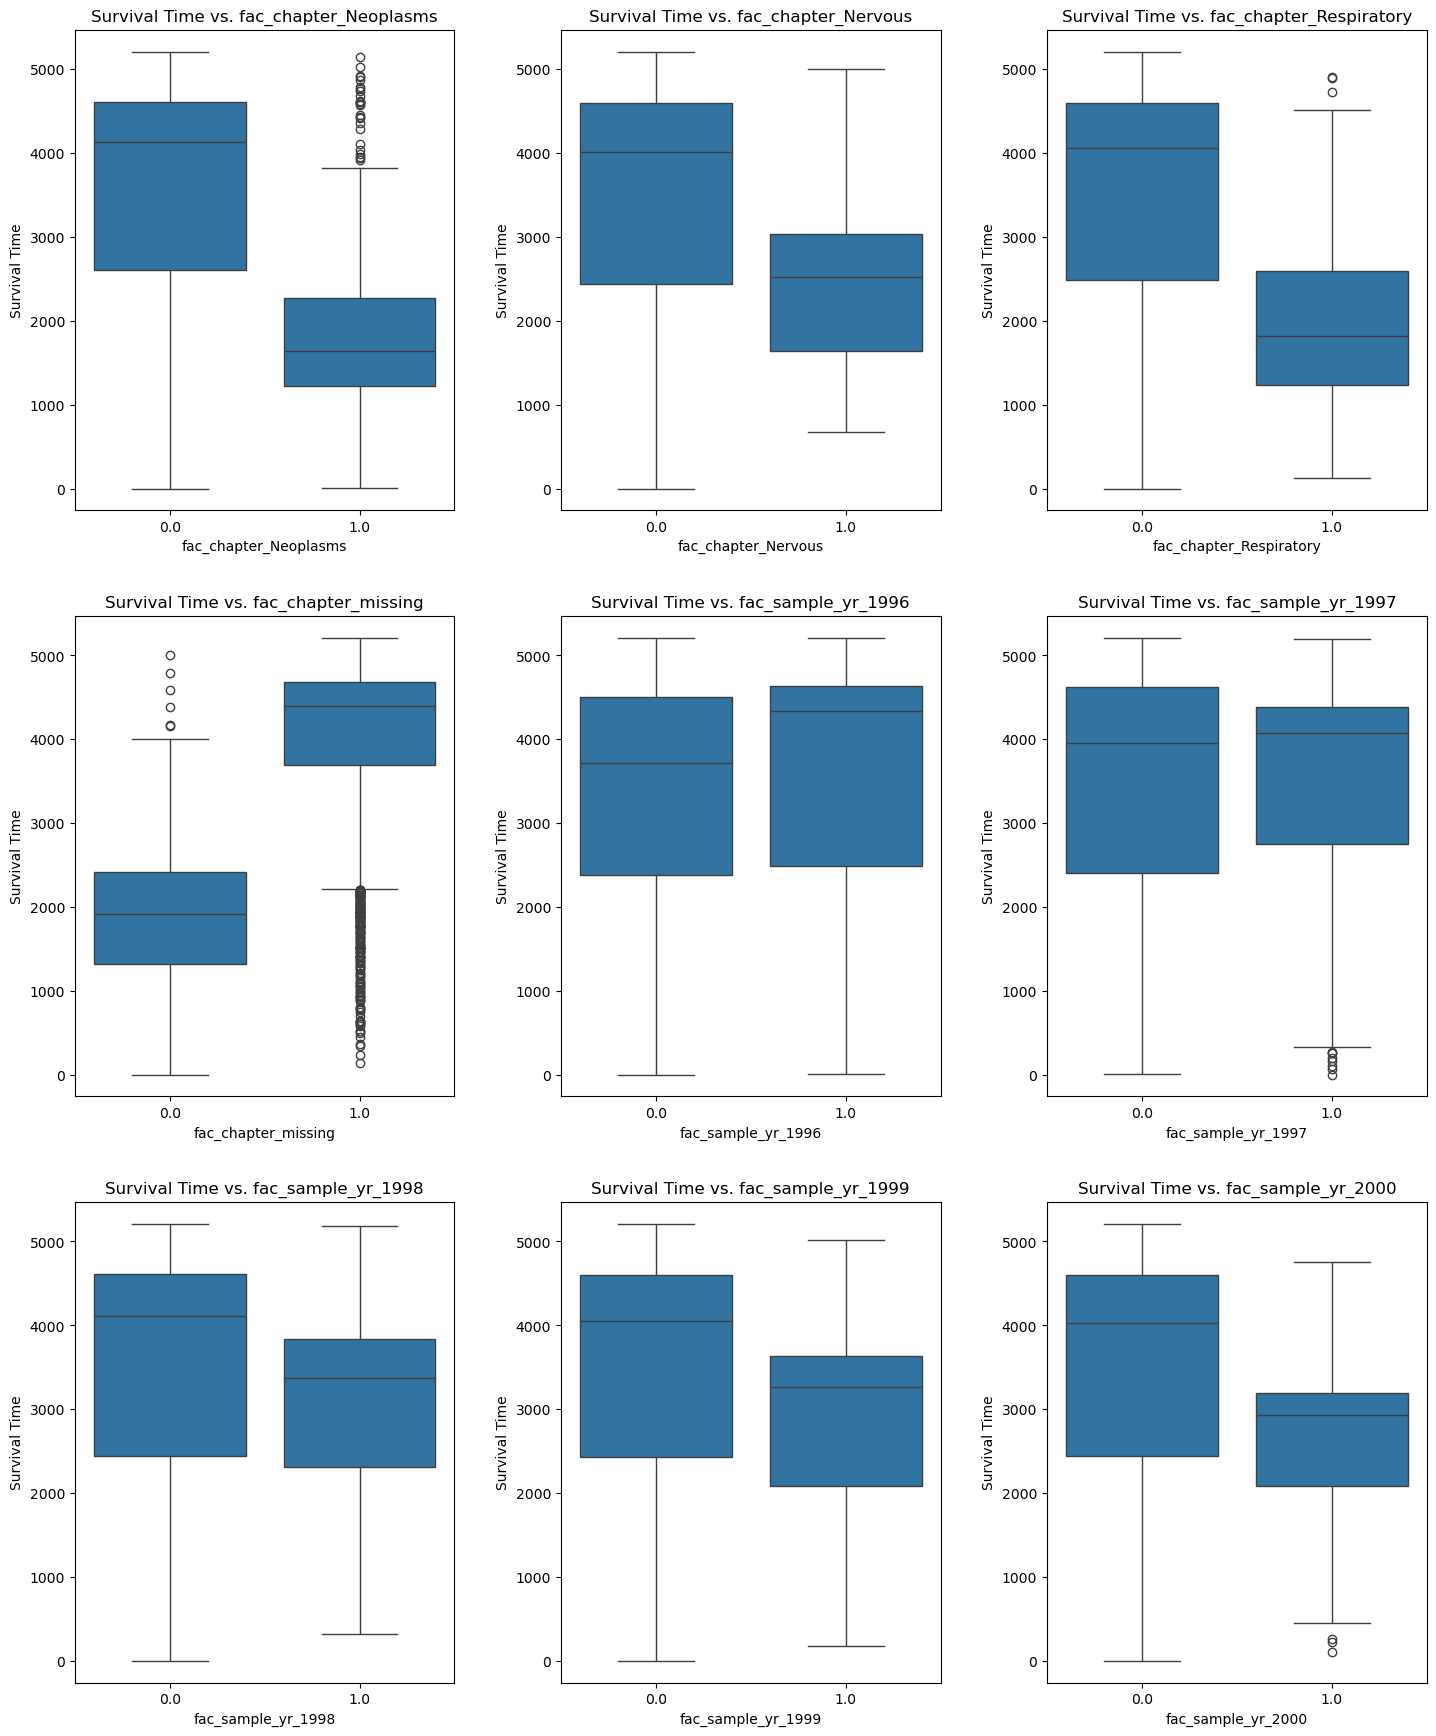

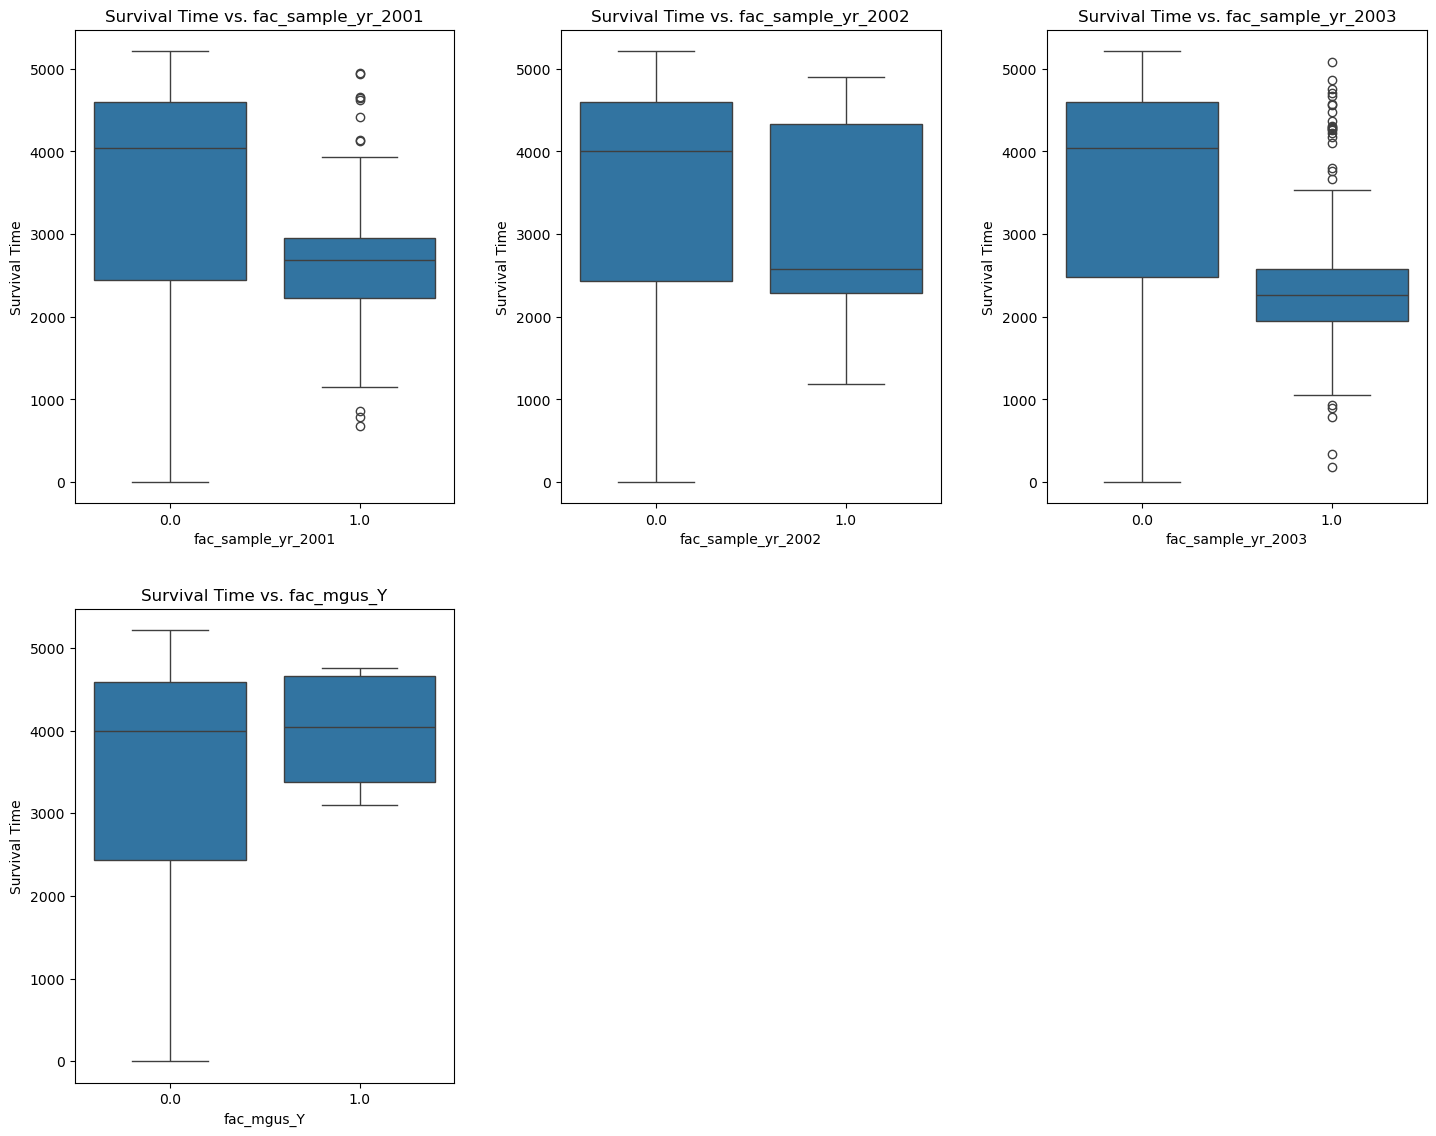

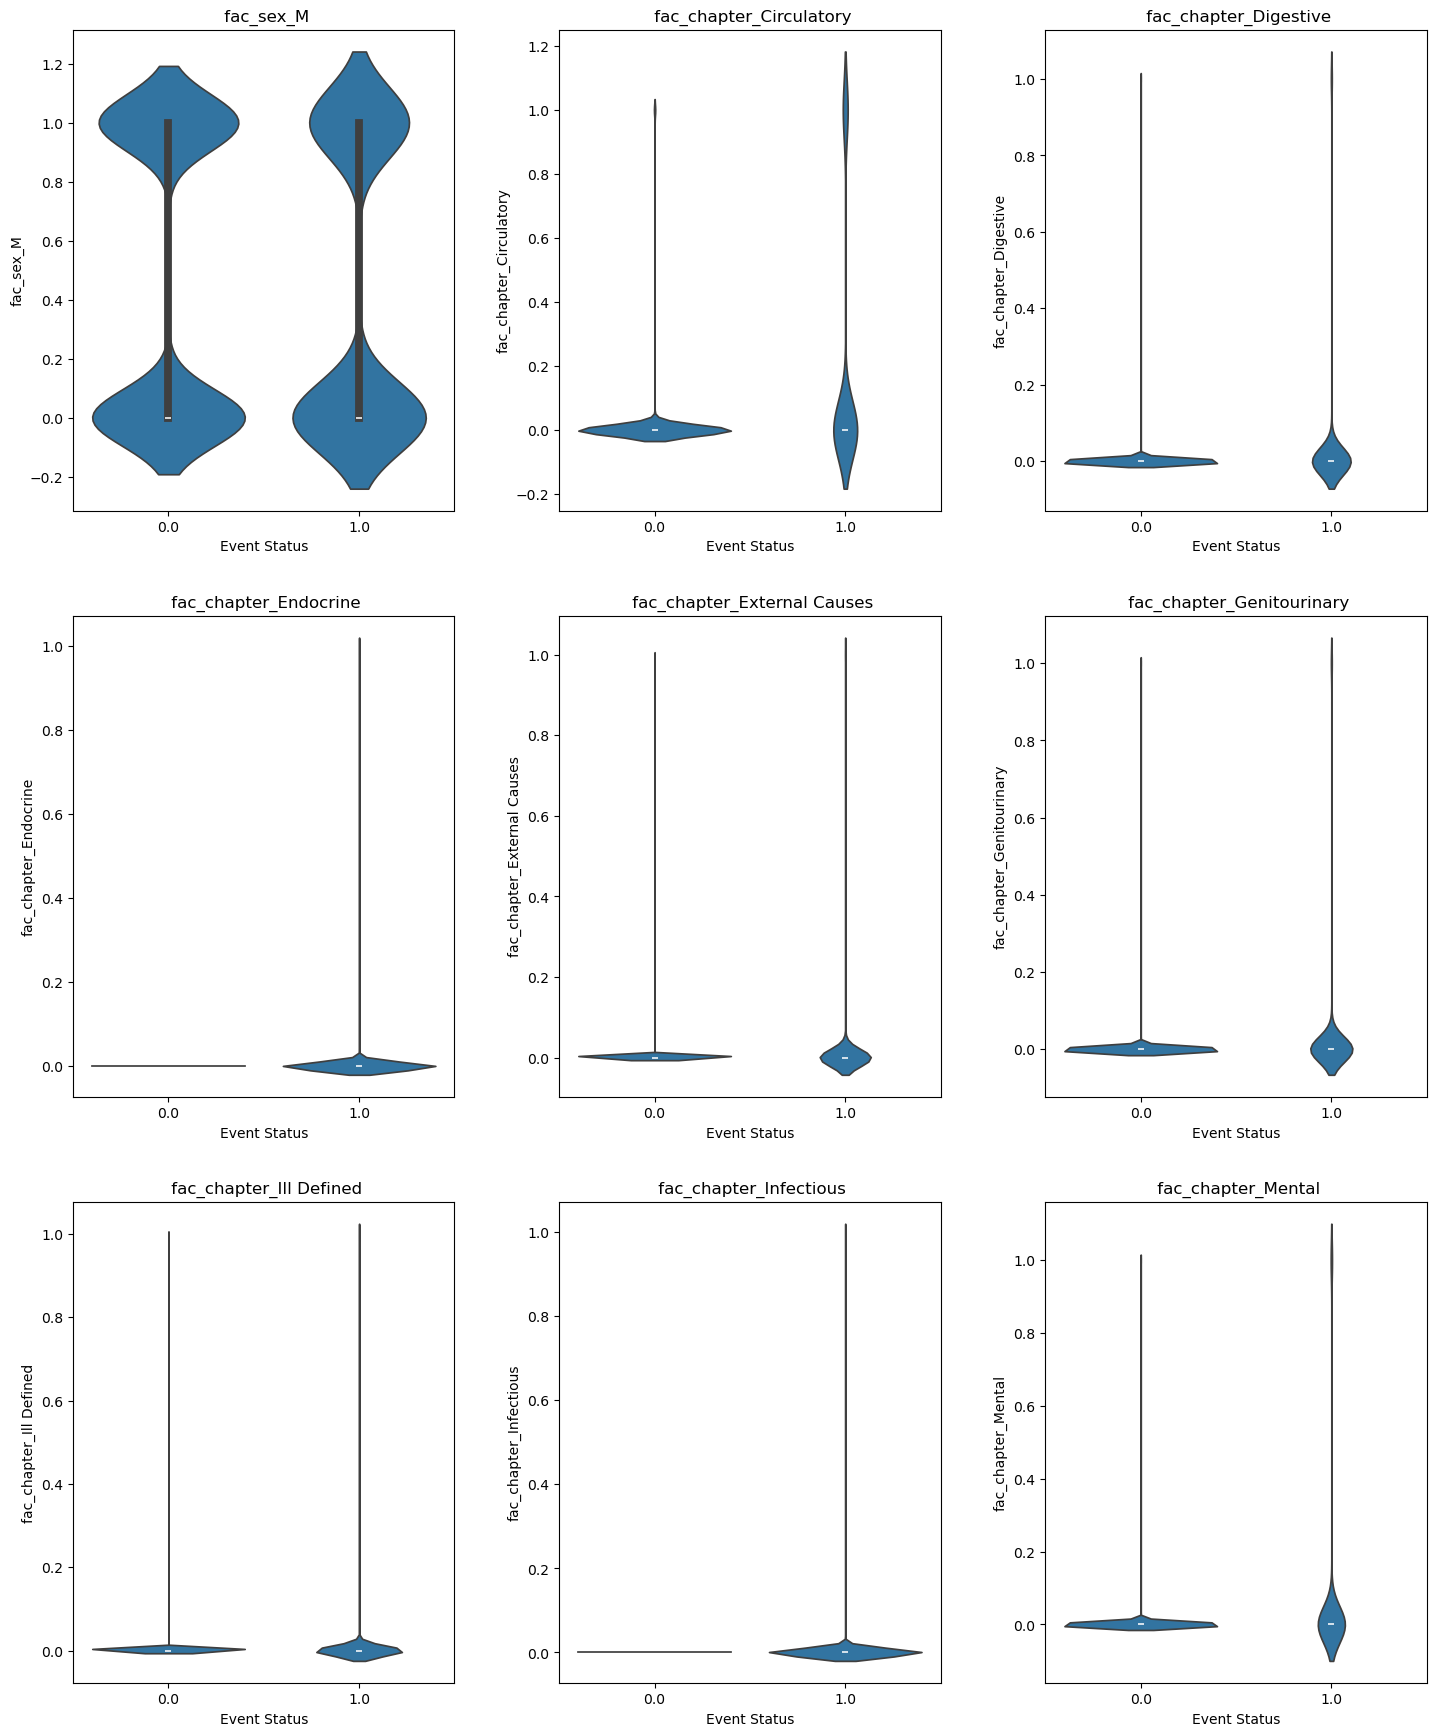

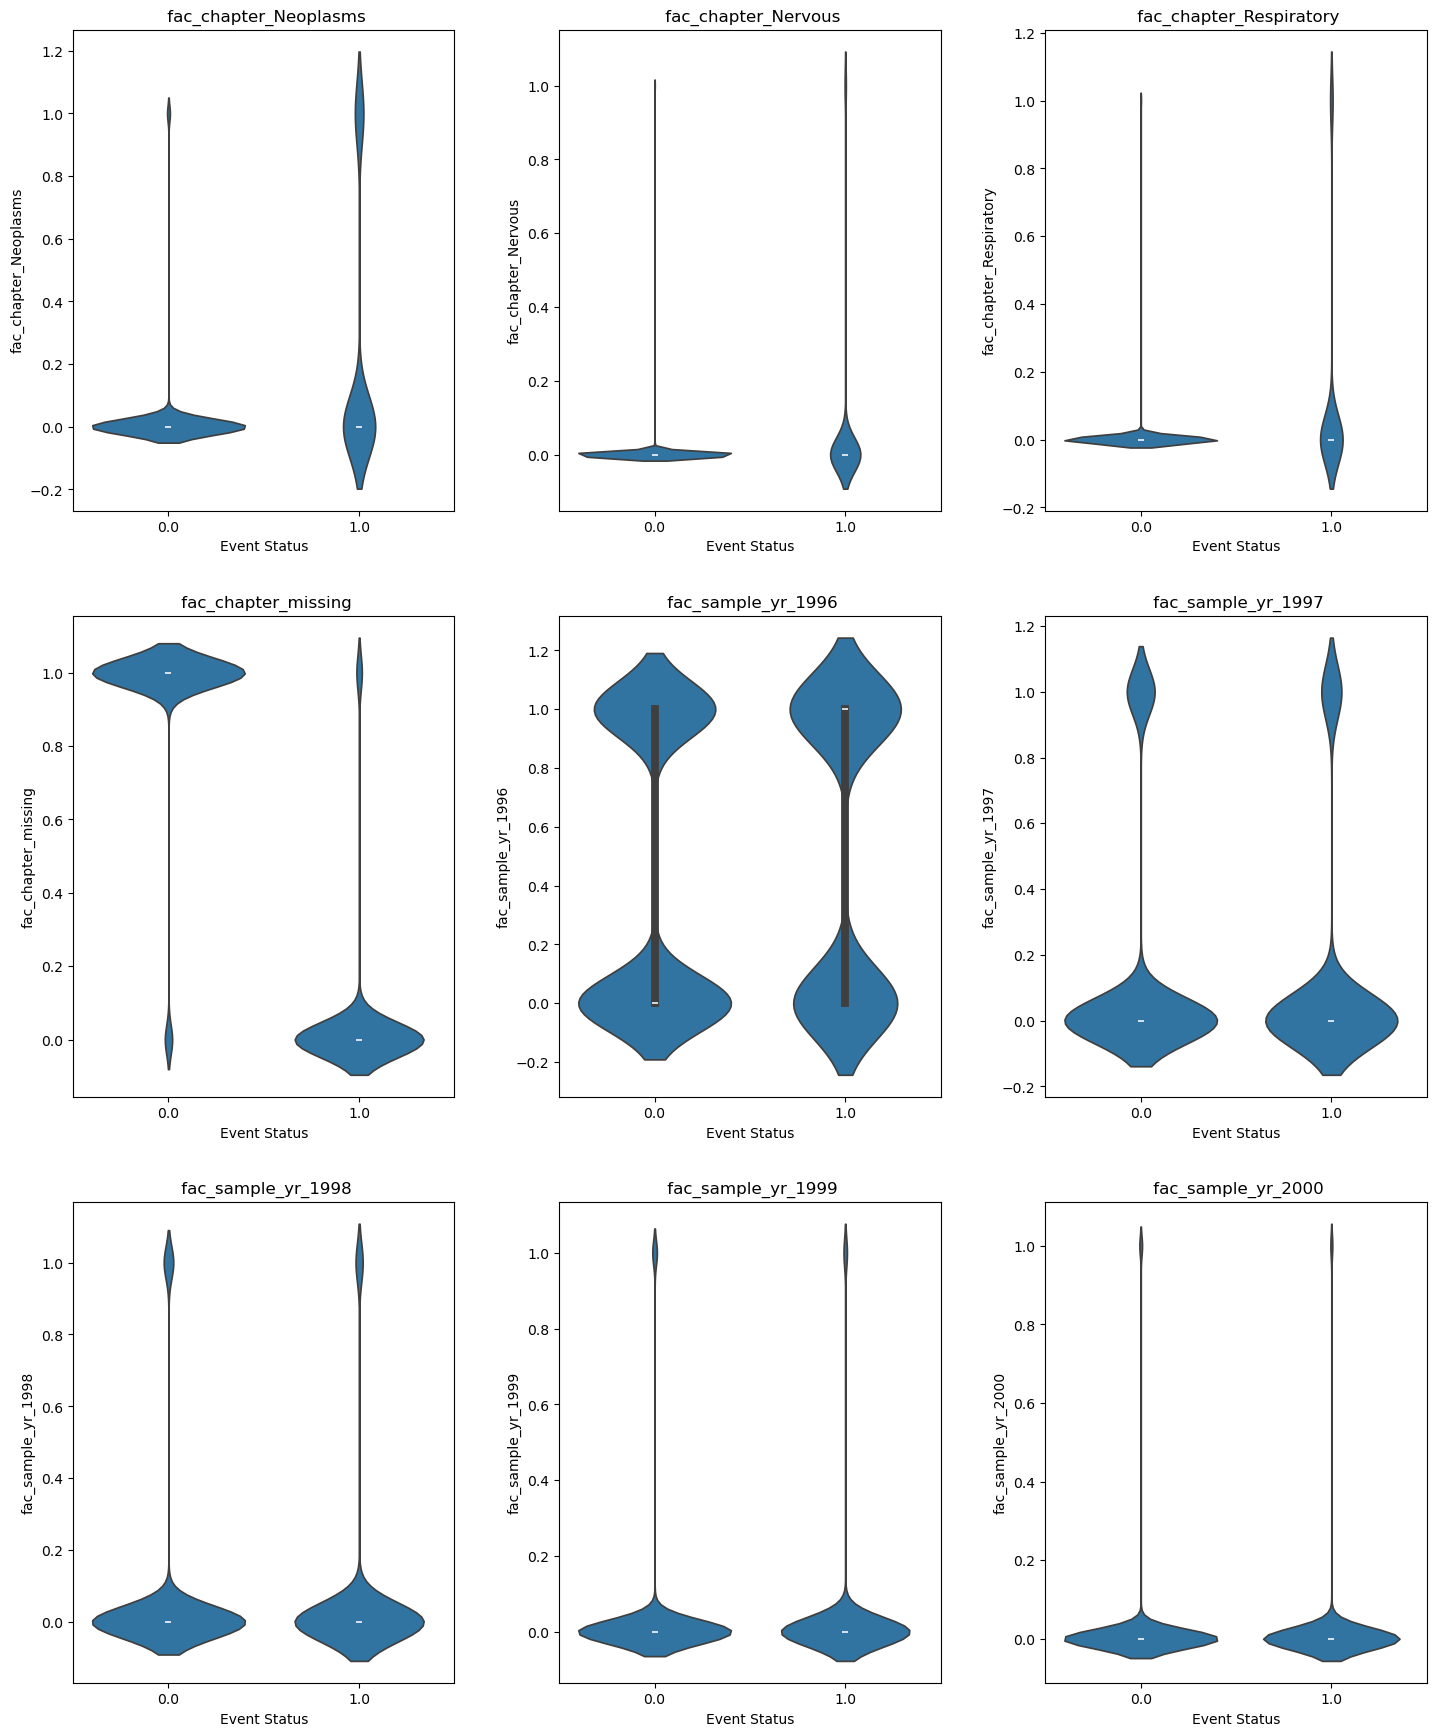

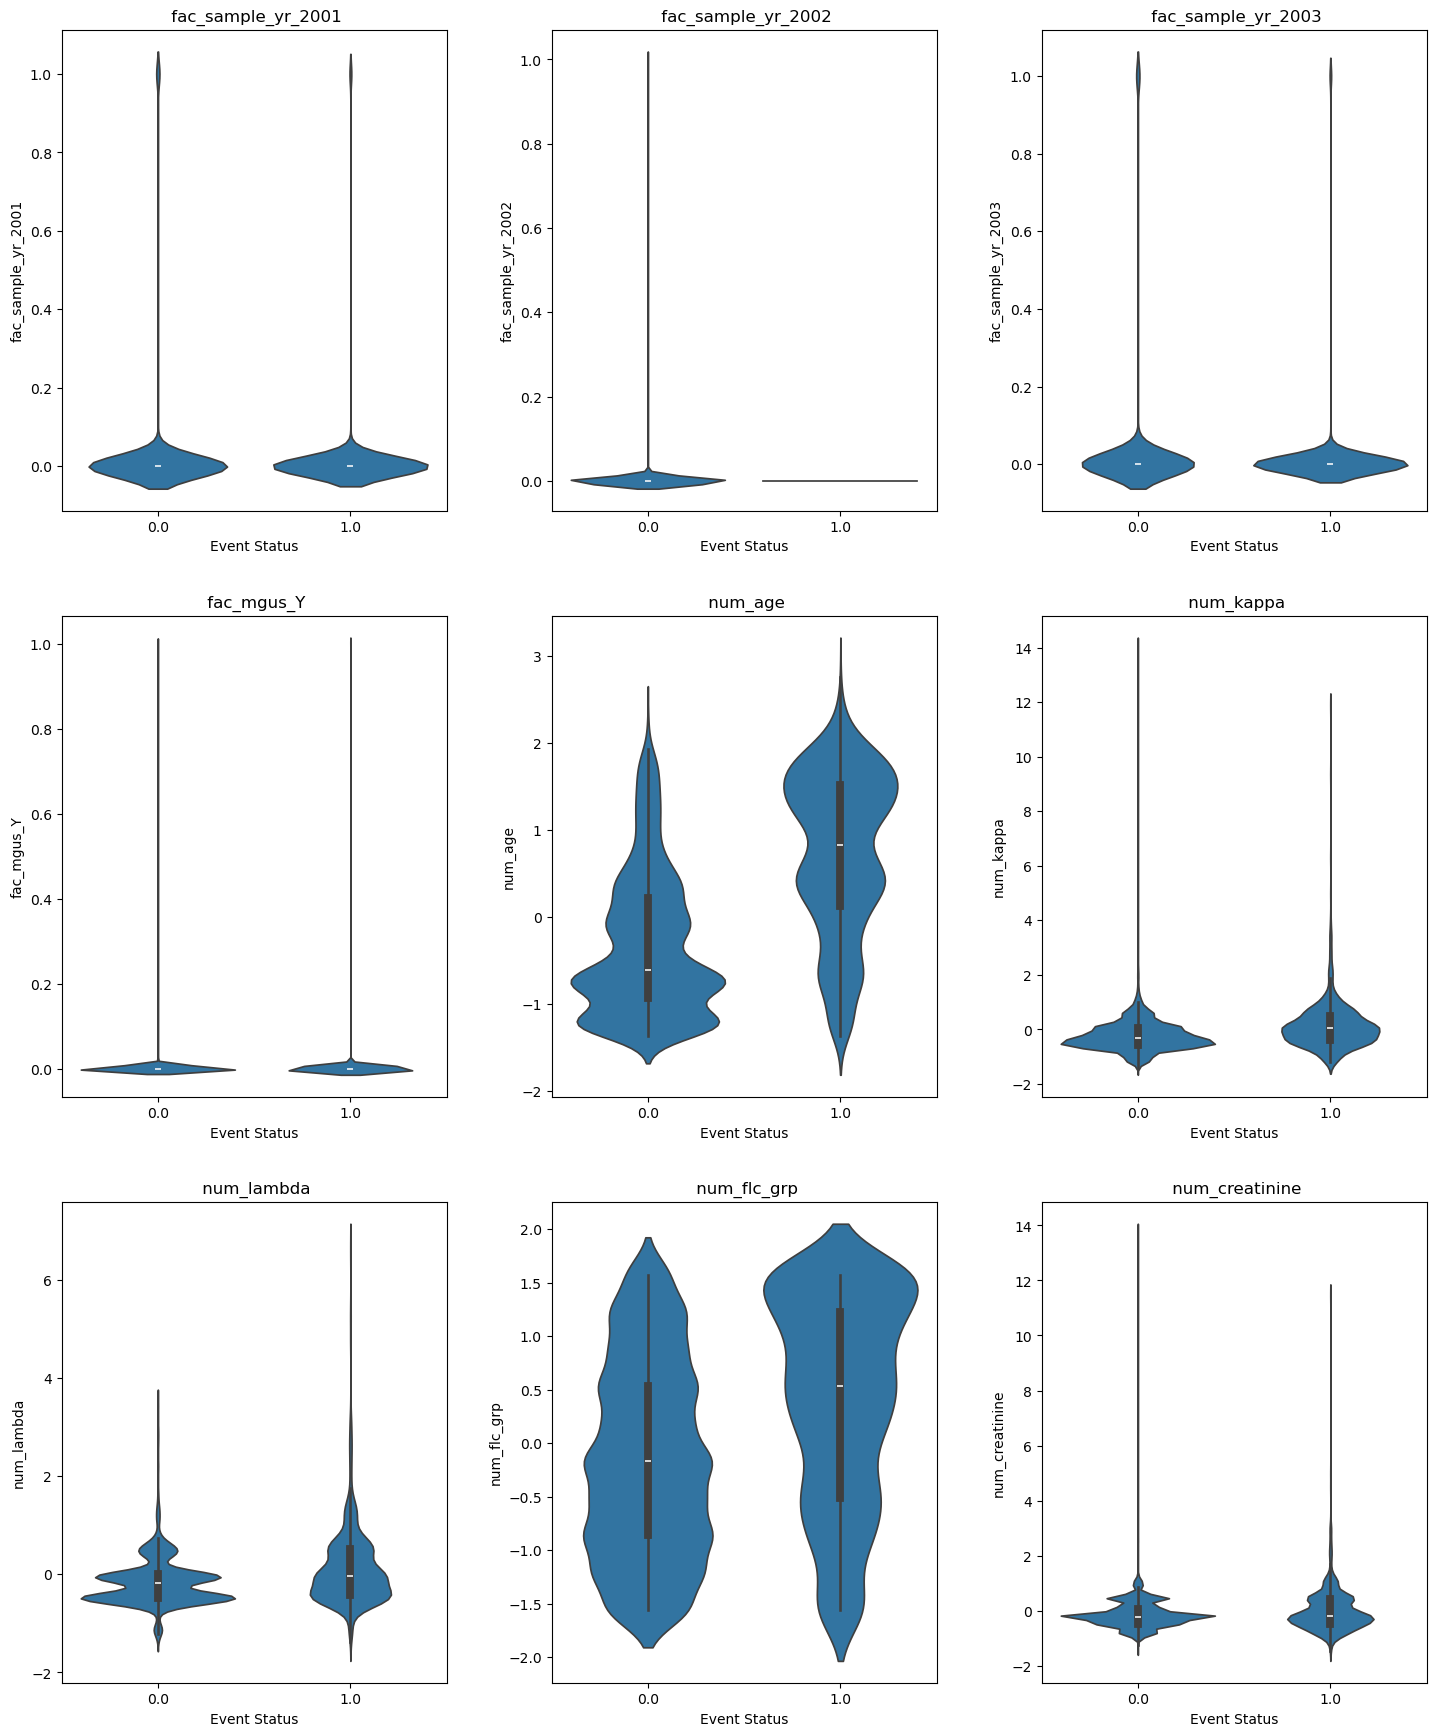

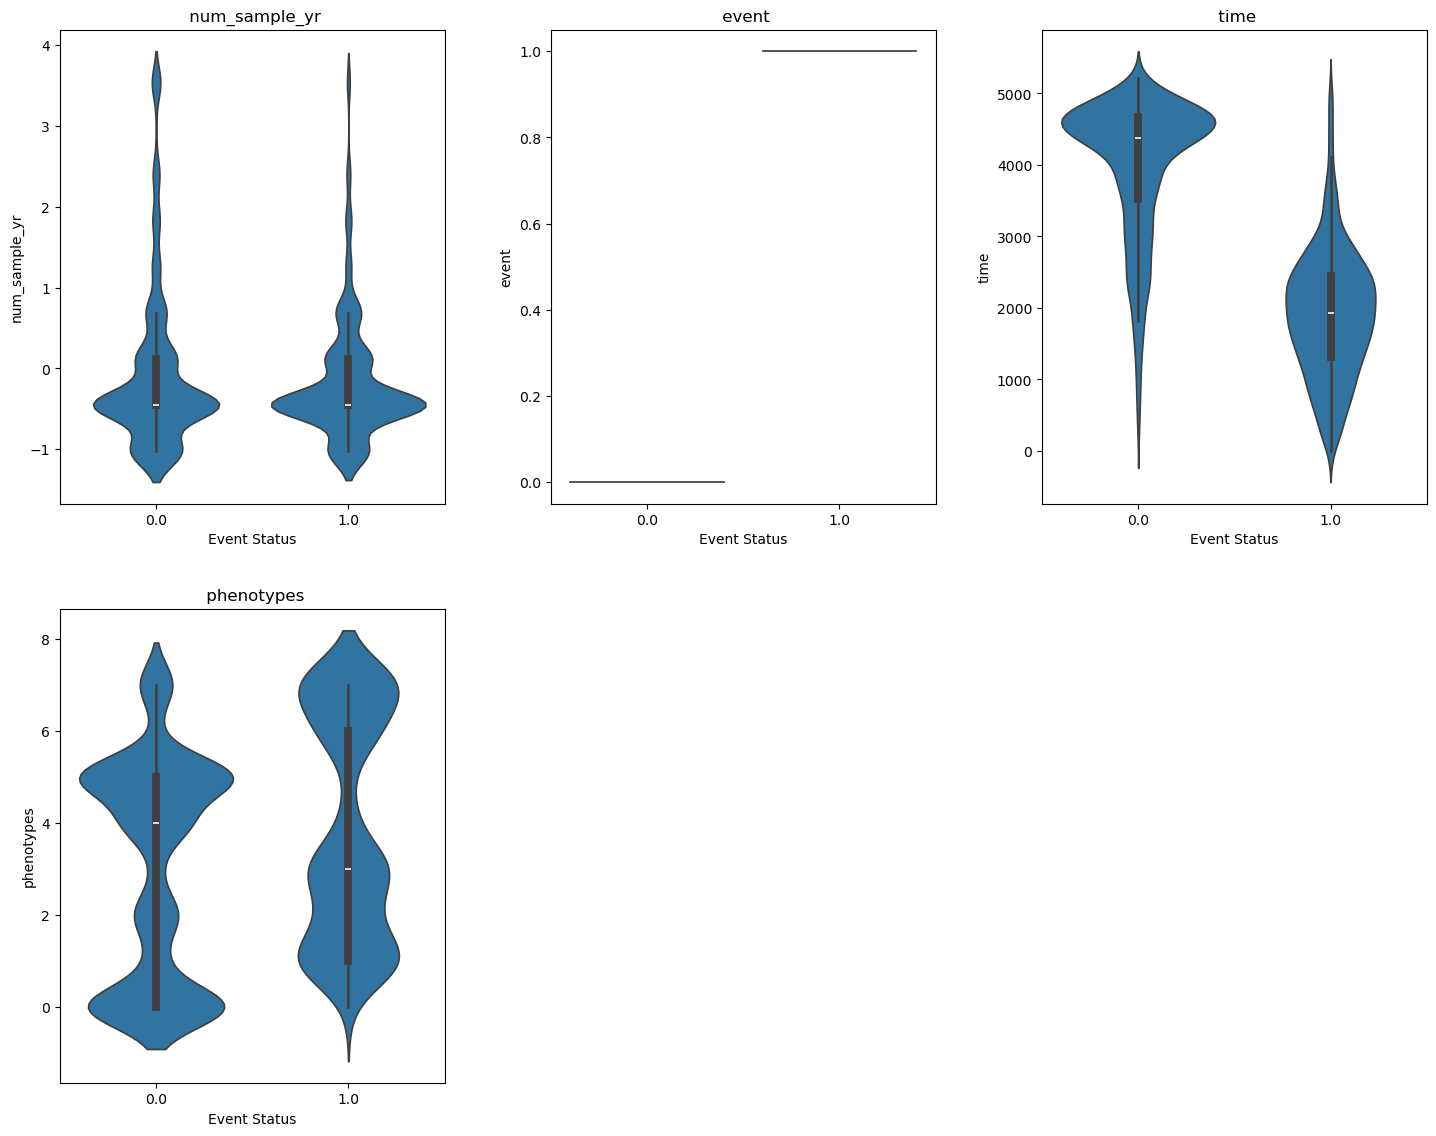

In [16]:
bivariate_analysis(dataset)


Overall Censoring Level:
event
0.0    0.765
1.0    0.235
Name: proportion, dtype: float64


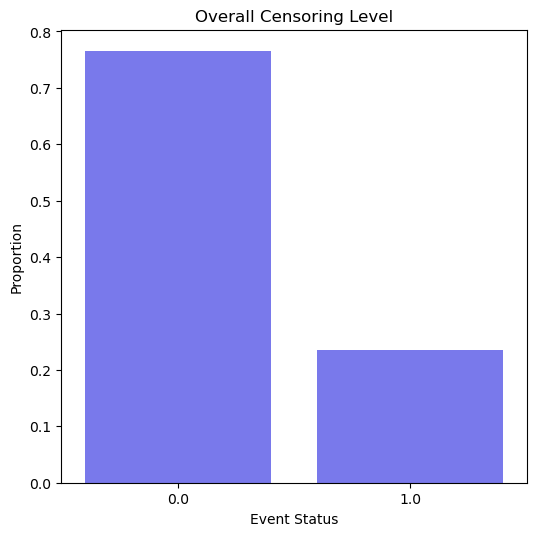

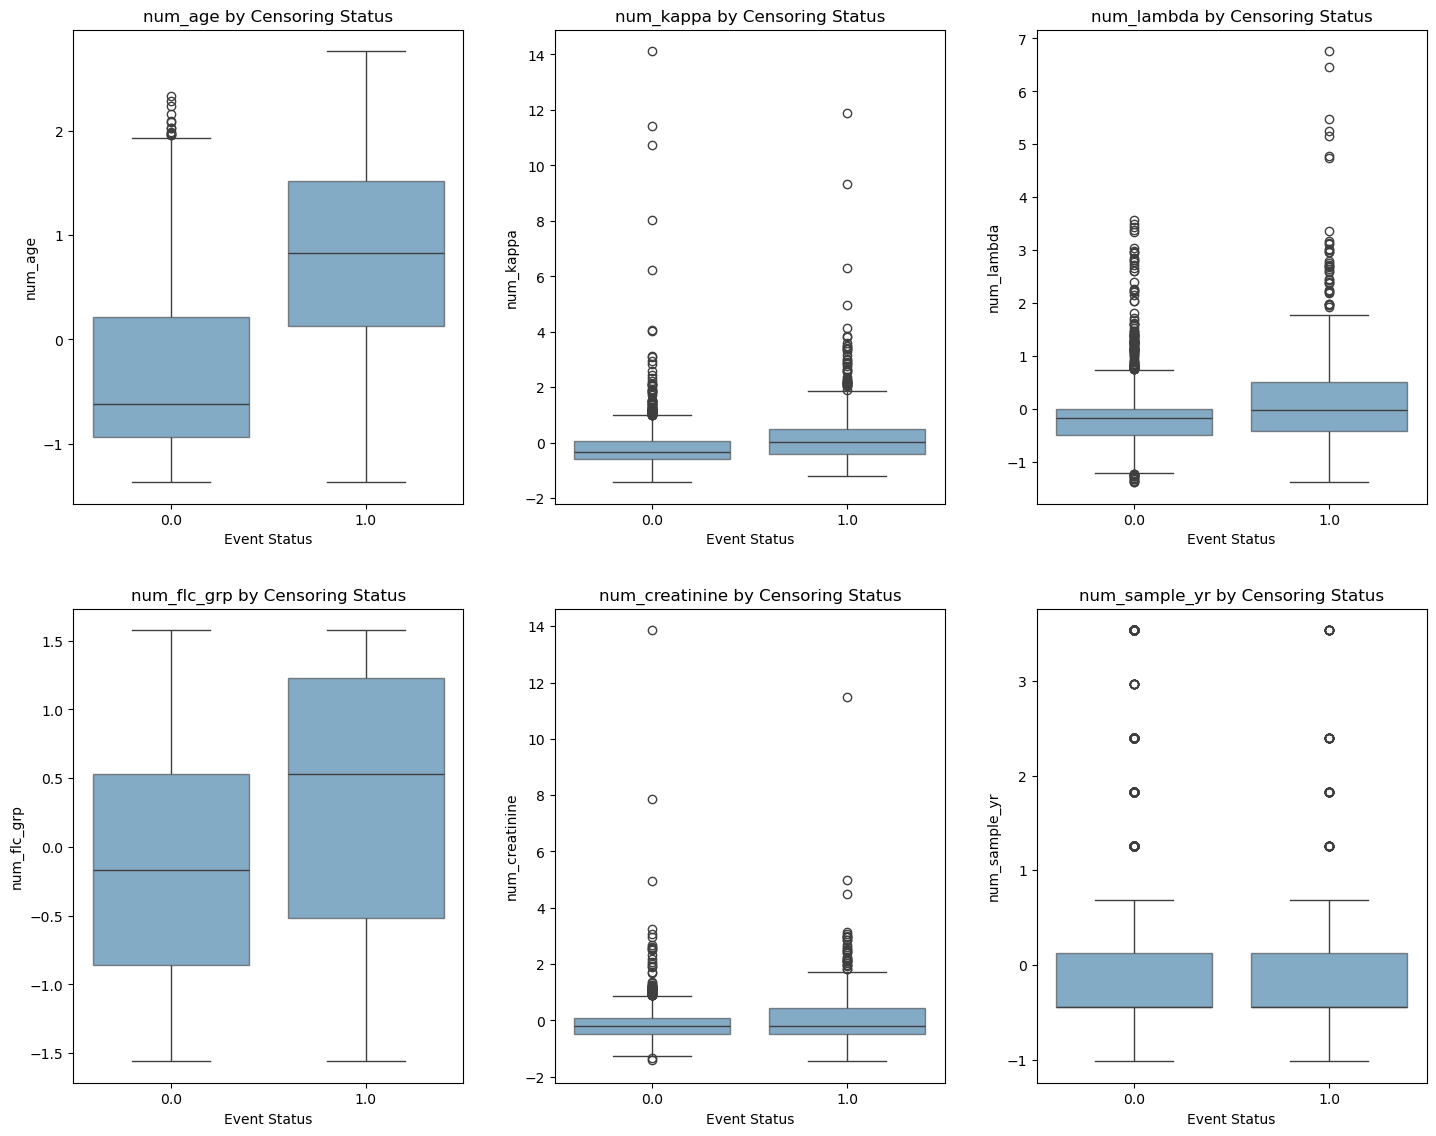

In [17]:
censoring_analysis(dataset)

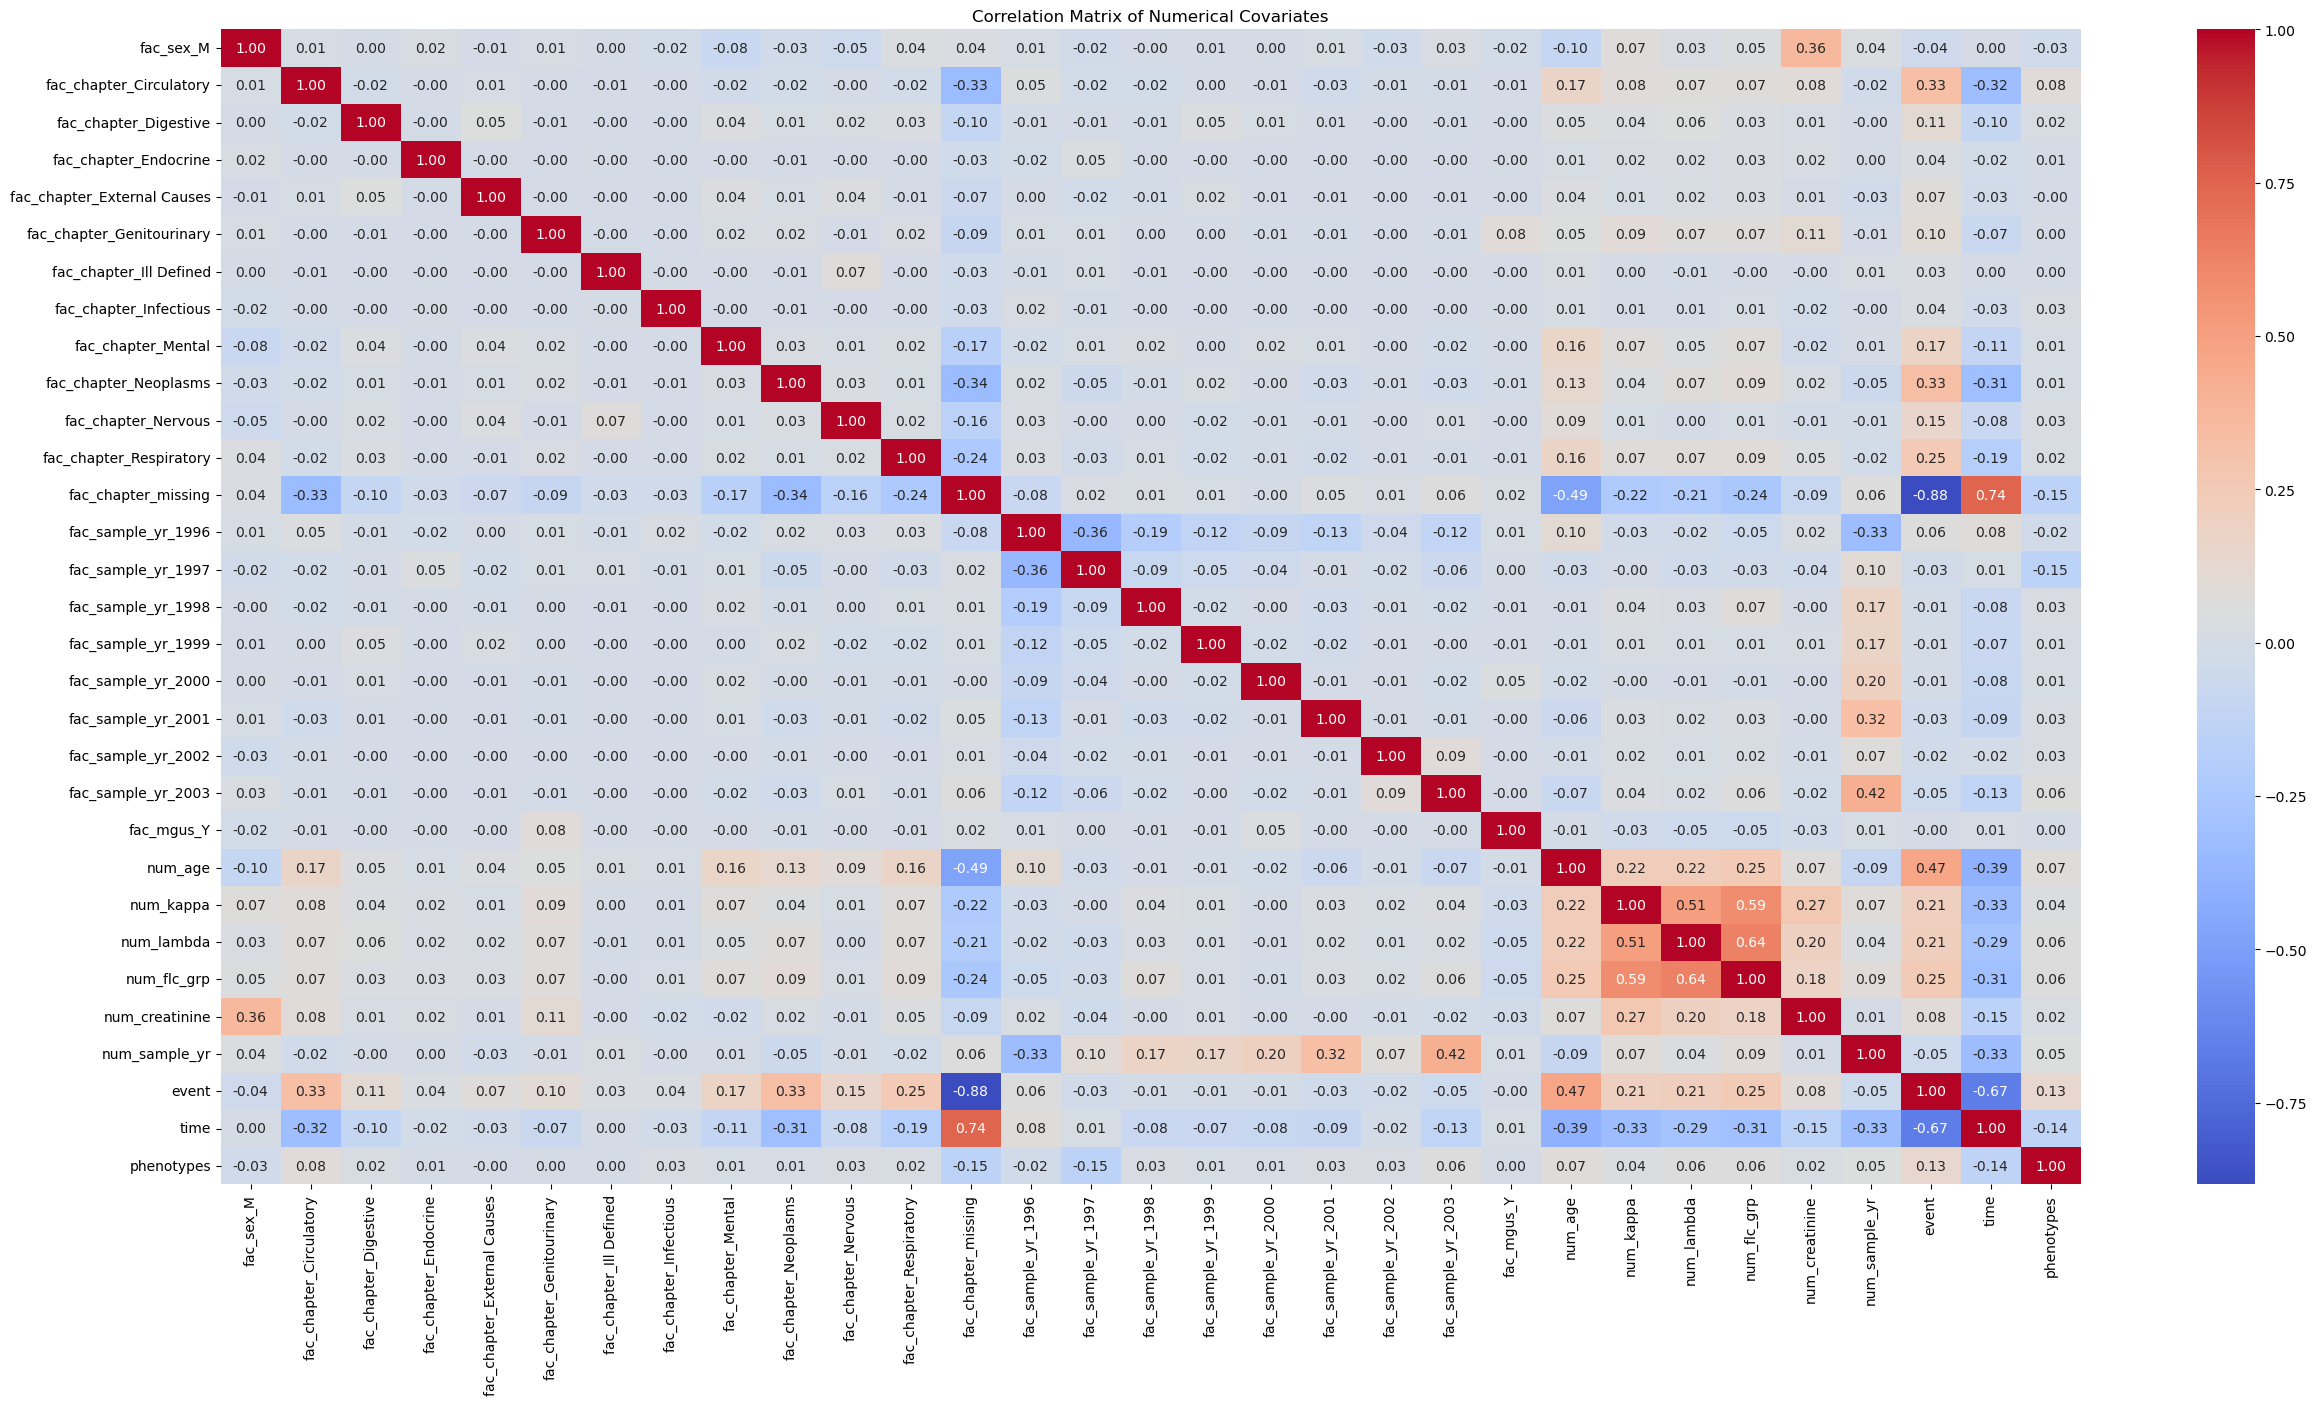

In [18]:
correlation_analysis(dataset)